In [252]:
# Importing relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

In [253]:
# importing libraries for importing data into pandas
from sqlalchemy import create_engine
import pandas as pd

# Credentials for connectiong string
username = 'postgres'
password = '1234'
host = 'localhost'
port = '5432'            
database = 'E_Commerce'

# Create the connection string
engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')

# Query the customers table and load into DataFrame
customers = pd.read_sql(f'SELECT * FROM customers', con=engine)

# Query the transactions table and load into DataFrame
transactions = pd.read_sql(f'SELECT * FROM transactions', con=engine)

# Query the churn table and load into DataFrame
churn = pd.read_sql(f'SELECT * FROM churn', con=engine)

# Query the session_events table and load into DataFrame
session_events = pd.read_sql(f'SELECT * FROM session_events', con=engine)

In [254]:
# View the first few rows of customers
customers.head()

,customer_id,full_name,age,city,gender,state,yearly_income,education,occupation
0,1,Indrans Roy,36,Delhi,Male,Delhi,958214.0,MBA,Finance Manager
1,2,Vritika Agarwal,64,Hyderabad,Female,Telangana,854908.0,MSc,Finance Manager
2,3,Rohan Ghose,22,Hyderabad,Male,Telangana,2993630.0,MSc,Finance Manager
3,4,Ehsaan Buch,32,Hyderabad,Male,Telangana,790845.0,B.A,Teacher
4,5,Pari Dave,45,Bangalore,Male,Karnataka,2405385.0,PhD,Doctor


In [255]:
# View the first few rows of transactions
transactions.head()

,transaction_id,customer_id,purchase_amount,product_category,payment_method,transaction_date
0,1,5143,27819.68,Electronics,UPI,2024-12-28 22:48:00
1,2,3756,20823.74,Electronics,Credit Card,2024-10-06 09:46:00
2,3,9992,20699.54,Electronics,Credit Card,2024-05-19 23:58:00
3,4,4686,37018.61,Premium Home Decor,UPI,2024-08-24 03:56:00
4,5,4709,2947.41,Premium Home Decor,UPI,2024-11-25 08:35:00


In [256]:
# View the first few rows of churn
churn.head()

,customer_id,total_orders,days_since_last_purchase,last_purchase_date
0,1,8,39,2025-02-10 11:32:00
1,2,8,117,2024-11-25 10:58:00
2,3,14,7,2025-03-14 23:09:00
3,4,5,28,2025-02-21 12:10:00
4,5,7,112,2024-11-29 22:16:00


In [257]:
# View the first few rows of session_events
session_events.head()

,session_id,customer_id,event_type,timestamp
0,2,3826,visit,2024-04-06 21:34:00
1,3,9581,visit,2024-09-15 00:51:00
2,4,3218,visit,2024-12-14 04:22:00
3,5,6234,visit,2024-06-28 09:16:00
4,5,6234,add_to_cart,2024-06-28 09:25:00


## Customers

In [259]:
# View the first few rows of customers
customers.head()

,customer_id,full_name,age,city,gender,state,yearly_income,education,occupation
0,1,Indrans Roy,36,Delhi,Male,Delhi,958214.0,MBA,Finance Manager
1,2,Vritika Agarwal,64,Hyderabad,Female,Telangana,854908.0,MSc,Finance Manager
2,3,Rohan Ghose,22,Hyderabad,Male,Telangana,2993630.0,MSc,Finance Manager
3,4,Ehsaan Buch,32,Hyderabad,Male,Telangana,790845.0,B.A,Teacher
4,5,Pari Dave,45,Bangalore,Male,Karnataka,2405385.0,PhD,Doctor


In [260]:
# shape of data
customers.shape

(9976, 9)

In [261]:
# info of customers DataFrame
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    9976 non-null   int64  
 1   full_name      9976 non-null   object 
 2   age            9976 non-null   int64  
 3   city           9976 non-null   object 
 4   gender         9976 non-null   object 
 5   state          9976 non-null   object 
 6   yearly_income  9976 non-null   float64
 7   education      9976 non-null   object 
 8   occupation     9976 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 701.6+ KB


In [262]:
# numerical columns statistics
customers.describe(include=['number']).T

,count,mean,std,min,25%,50%,75%,max
customer_id,9976.0,5.046197e+03,2910.491884,1.0,2523.75,5049.5,7570.25,10150.0
age,9976.0,3.467131e+01,9.475547,18.0,28.00,35.0,41.00,70.0
yearly_income,9976.0,1.451863e+06,717243.943370,300104.0,846614.75,1385703.0,1931870.00,2999652.0


In [263]:
# categorical columns statistics
customers.describe(exclude=['number']).T

,count,unique,top,freq
full_name,9976,9428,Anya Tank,3
city,9976,10,Mumbai,1921
gender,9976,2,Female,5006
state,9976,9,Maharashtra,2441
education,9976,12,MBA,2085
occupation,9976,15,Finance Manager,1651


In [264]:
# Checking for missing values
customers.isna().sum()

customer_id      0
full_name        0
age              0
city             0
gender           0
state            0
yearly_income    0
education        0
occupation       0
dtype: int64

In [265]:
# Checking for duplicates in the data
customers.duplicated().sum()

0


=== Customers Numerical Columns Univariate Distributions ===


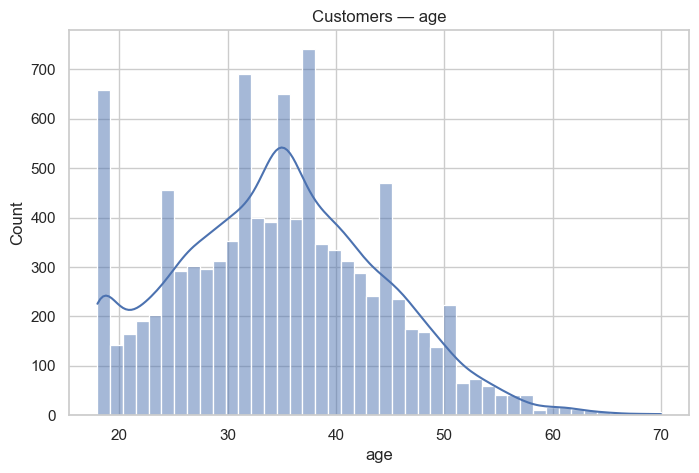

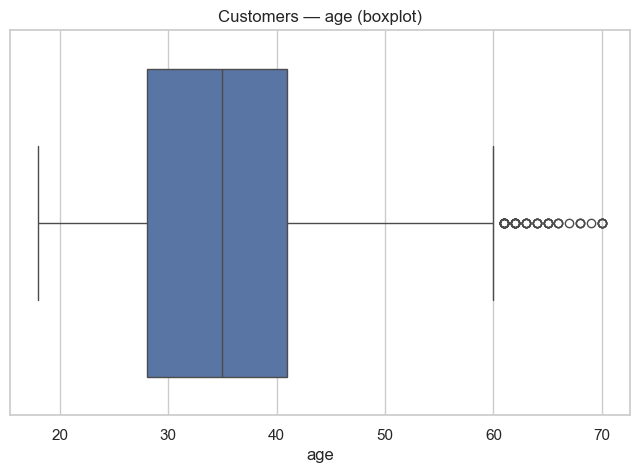

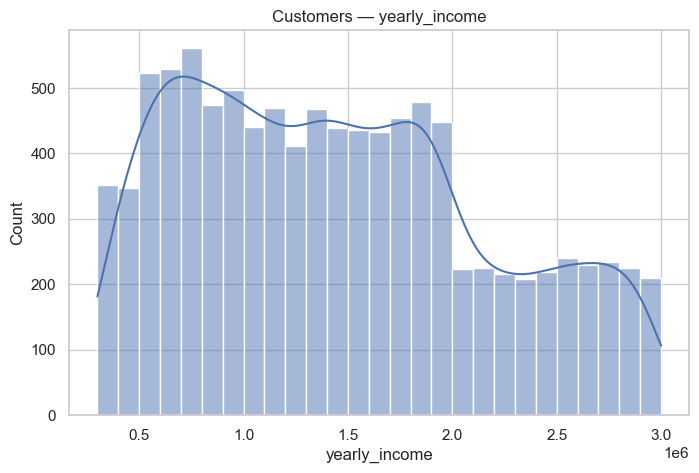

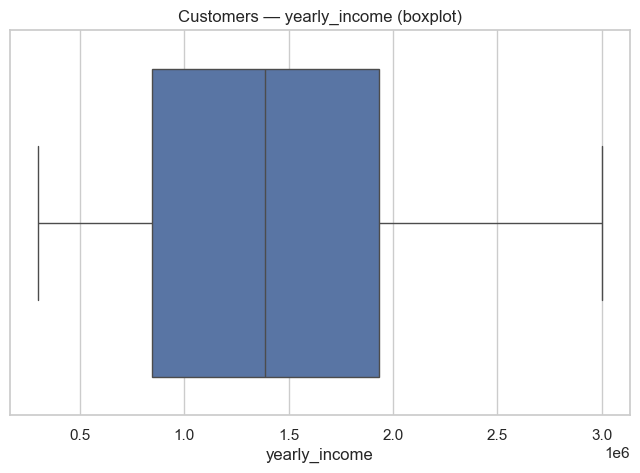


=== Customers Categorical Columns Univariate Distributions ===


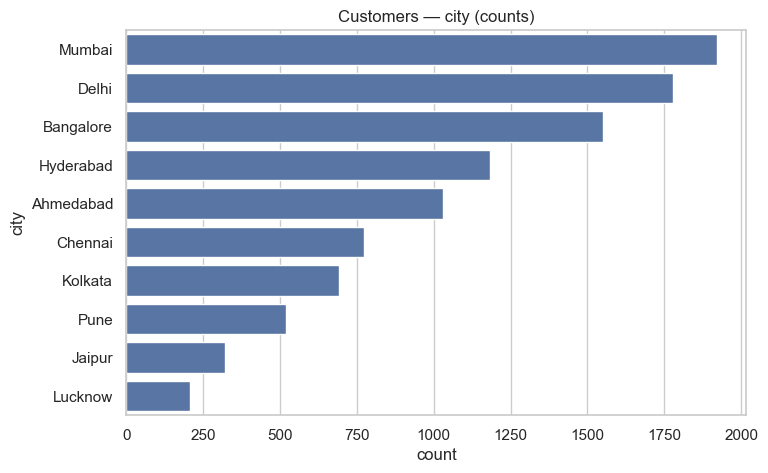

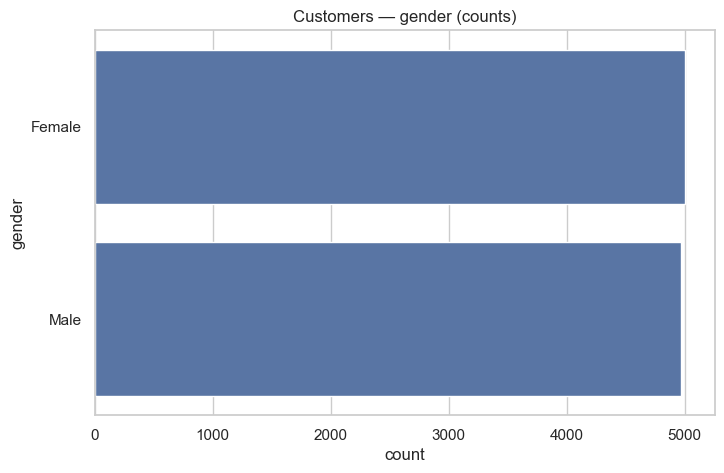

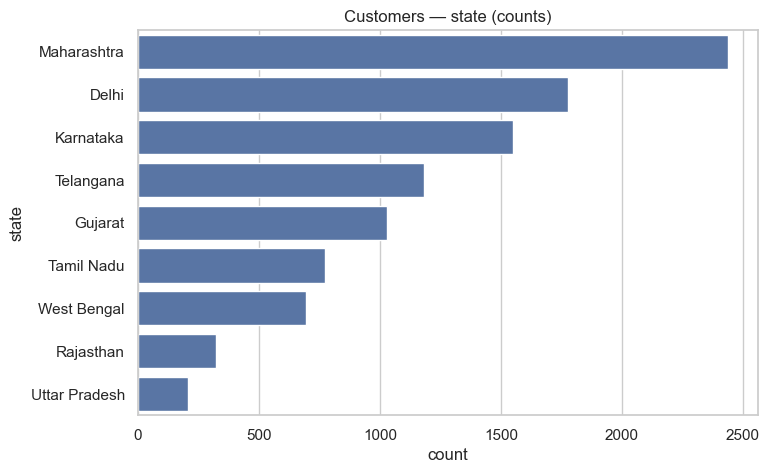

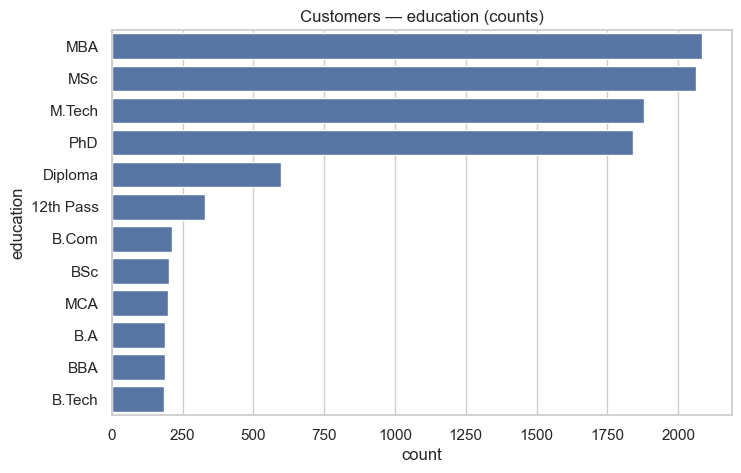

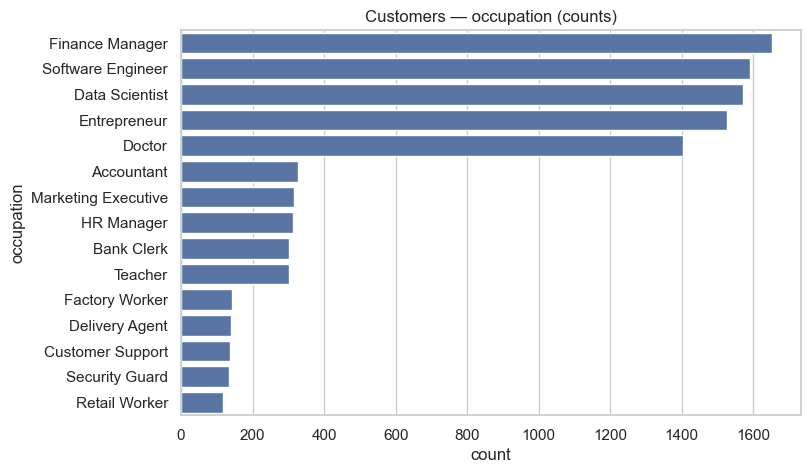

In [266]:
print(f"\n=== {'Customers'} Numerical Columns Univariate Distributions ===")
for c in ['age', 'yearly_income']:
    plt.figure(figsize=(8,5))
    sns.histplot(customers[c], kde=True).set_title(f"{'Customers'} — {c}")
    plt.show()
    plt.figure(figsize=(8,5))
    sns.boxplot(x=customers[c]).set_title(f"{'Customers'} — {c} (boxplot)")
    plt.show()

print(f"\n=== {'Customers'} Categorical Columns Univariate Distributions ===")
for c in ['city', 'gender', 'state', 'education', 'occupation']:
    plt.figure(figsize=(8,5))
    sns.countplot(y=customers[c], order=customers[c].value_counts().index)
    plt.title(f"{'Customers'} — {c} (counts)")
    plt.show()

## Transactions

In [268]:
# View the first few rows of transactions
transactions.head()

,transaction_id,customer_id,purchase_amount,product_category,payment_method,transaction_date
0,1,5143,27819.68,Electronics,UPI,2024-12-28 22:48:00
1,2,3756,20823.74,Electronics,Credit Card,2024-10-06 09:46:00
2,3,9992,20699.54,Electronics,Credit Card,2024-05-19 23:58:00
3,4,4686,37018.61,Premium Home Decor,UPI,2024-08-24 03:56:00
4,5,4709,2947.41,Premium Home Decor,UPI,2024-11-25 08:35:00


In [269]:
transactions.sort_values('transaction_date', ascending=False)

,transaction_id,customer_id,purchase_amount,product_category,payment_method,transaction_date
70872,71115,1881,5381.89,Electronics,UPI,2025-03-19 08:56:00
55749,55949,5737,4244.97,Books,UPI,2025-03-19 08:40:00
14199,14246,9851,25951.07,Premium Home Decor,Credit Card,2025-03-19 08:39:00
18910,18971,6631,12472.92,Home & Kitchen,Net Banking,2025-03-19 08:29:00
27117,27192,3557,21518.76,Luxury Fashion,Credit Card,2025-03-19 08:24:00
...,...,...,...,...,...,...
53947,54138,7513,11982.59,Home & Kitchen,UPI,2024-03-19 04:12:00
31897,31987,1002,13034.99,Premium Home Decor,Credit Card,2024-03-19 04:09:00
50453,50628,7081,8709.87,Fashion,Debit Card,2024-03-19 04:02:00
37544,37660,3396,2636.38,Luxury Fashion,UPI,2024-03-19 03:59:00


In [270]:
# shape of data
transactions.shape

(79763, 6)

In [271]:
# info of transactions DataFrame
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79763 entries, 0 to 79762
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_id    79763 non-null  int64         
 1   customer_id       79763 non-null  int64         
 2   purchase_amount   79763 non-null  float64       
 3   product_category  79763 non-null  object        
 4   payment_method    79763 non-null  object        
 5   transaction_date  79763 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 3.7+ MB


In [272]:
# numerical columns statistics
transactions['purchase_amount'].describe()

count    79763.000000
mean     18777.176586
std      15538.015471
min        300.000000
25%       4330.455000
50%      14583.860000
75%      32109.720000
max      49999.110000
Name: purchase_amount, dtype: float64

In [273]:
# categorical columns statistics
transactions.describe(exclude=['number']).T

,count,unique,top,freq,mean,min,25%,50%,75%,max
product_category,79763,9,Luxury Fashion,20615,NaN,NaN,NaN,NaN,NaN,NaN
payment_method,79763,6,Credit Card,30551,NaN,NaN,NaN,NaN,NaN,NaN
transaction_date,79763,NaN,NaN,NaN,2024-09-17 23:44:30.062058752,2024-03-19 03:47:00,2024-06-18 03:04:00,2024-09-18 16:08:00,2024-12-18 17:28:30,2025-03-19 08:56:00


In [274]:
# Checking for missing values
transactions.isna().sum()

transaction_id      0
customer_id         0
purchase_amount     0
product_category    0
payment_method      0
transaction_date    0
dtype: int64

In [275]:
# Checking for duplicates in the data
transactions.duplicated().sum()

0


=== transactions Numerical Columns Univariate Distributions ===


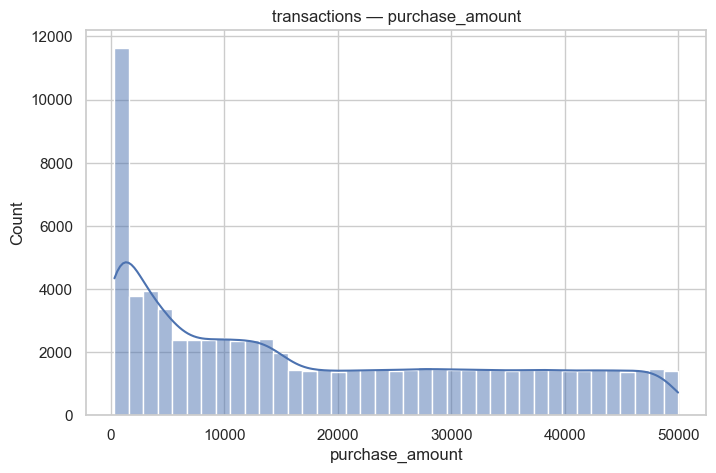

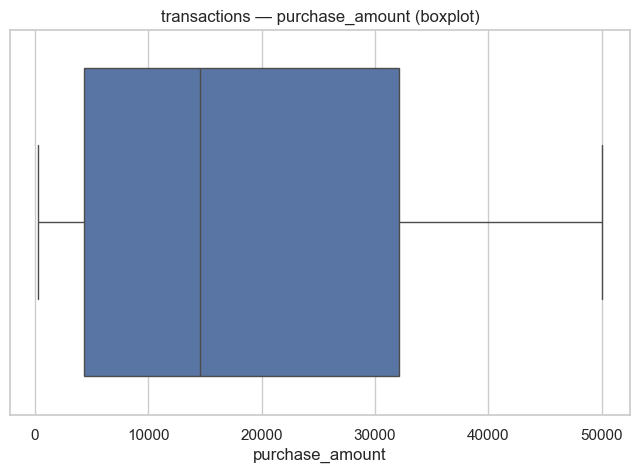


=== transactions Categorical Columns Univariate Distributions ===


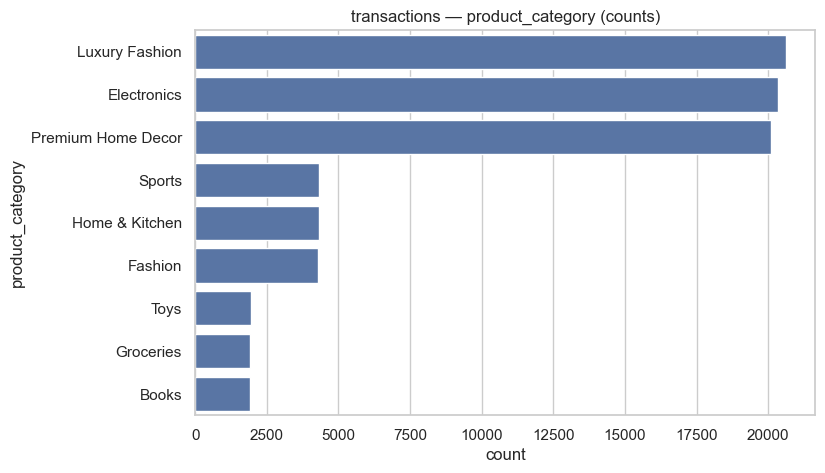

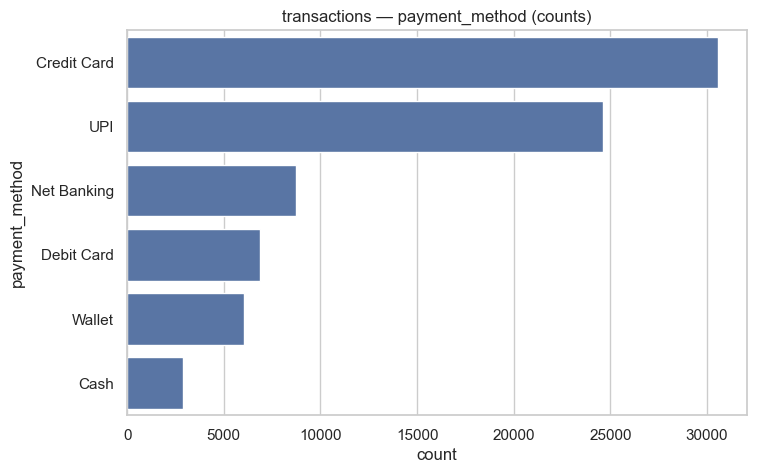

In [276]:
name = 'transactions'
print(f"\n=== {name} Numerical Columns Univariate Distributions ===")
for c in ['purchase_amount']:
    plt.figure(figsize=(8,5))
    sns.histplot(transactions[c], kde=True).set_title(f"{name} — {c}")
    plt.show()
    plt.figure(figsize=(8,5))
    sns.boxplot(x=transactions[c]).set_title(f"{name} — {c} (boxplot)")
    plt.show()

print(f"\n=== {name} Categorical Columns Univariate Distributions ===")
for c in ['product_category', 'payment_method']:
    plt.figure(figsize=(8,5))
    sns.countplot(y=transactions[c], order=transactions[c].value_counts().index)
    plt.title(f"{name} — {c} (counts)")
    plt.show()

📋 Transactions per Month:


,transaction_date,transaction_count
0,2024-03-31,2834
1,2024-04-30,6543
2,2024-05-31,6778
3,2024-06-30,6507
4,2024-07-31,6756
5,2024-08-31,6696
6,2024-09-30,6554
7,2024-10-31,6763
8,2024-11-30,6433
9,2024-12-31,6918


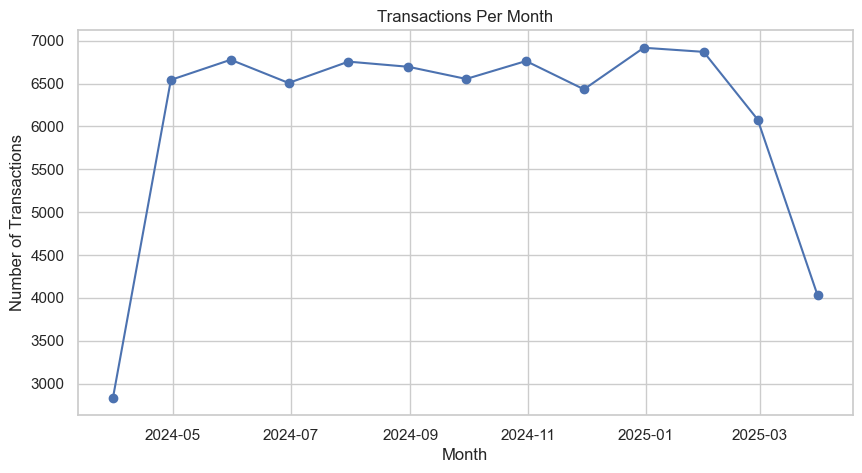

In [277]:
# Create monthly summary
monthly_summary = transactions.set_index('transaction_date').resample('ME').size().reset_index(name='transaction_count')

# Display table
print("📋 Transactions per Month:")
display(monthly_summary)

# Plot
plt.figure(figsize=(10,5))
plt.plot(monthly_summary['transaction_date'], monthly_summary['transaction_count'], marker='o')
plt.title('Transactions Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()


📋 Transactions per Week:


,transaction_date,transaction_count
0,2024-03-24,1241
1,2024-03-31,1593
2,2024-04-07,1596
3,2024-04-14,1560
4,2024-04-21,1494
5,2024-04-28,1479
6,2024-05-05,1483
7,2024-05-12,1521
8,2024-05-19,1553
9,2024-05-26,1495


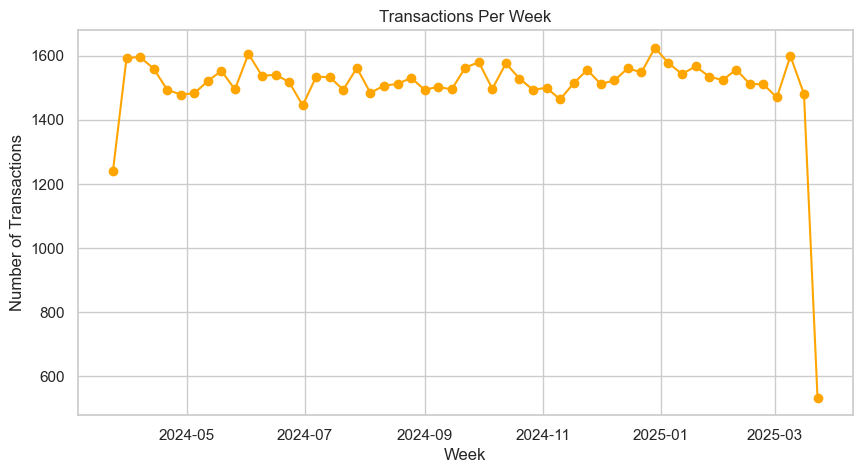

In [278]:
# Create weekly summary
weekly_summary = transactions.set_index('transaction_date').resample('W').size().reset_index(name='transaction_count')

# Display table
print("📋 Transactions per Week:")
display(weekly_summary)

# Plot
plt.figure(figsize=(10,5))
plt.plot(weekly_summary['transaction_date'], weekly_summary['transaction_count'], marker='o', color='orange')
plt.title('Transactions Per Week')
plt.xlabel('Week')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()

📋 Transactions by Day of Week:


,day_of_week,transaction_count
0,Monday,11192
1,Tuesday,11558
2,Wednesday,11364
3,Thursday,11377
4,Friday,11472
5,Saturday,11285
6,Sunday,11515


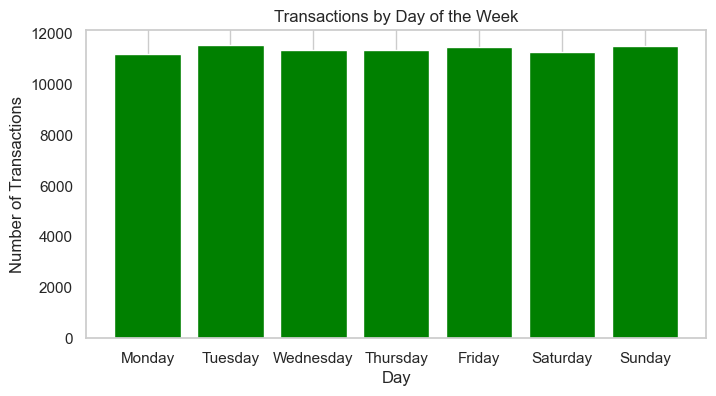

In [279]:
# Extract day name
transactions['day_of_week'] = transactions['transaction_date'].dt.day_name()

# Create summary
day_of_week_summary = transactions['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
).reset_index()

day_of_week_summary.columns = ['day_of_week', 'transaction_count']

# Display table
print("📋 Transactions by Day of Week:")
display(day_of_week_summary)

# Plot
plt.figure(figsize=(8,4))
plt.bar(day_of_week_summary['day_of_week'], day_of_week_summary['transaction_count'], color='green')
plt.title('Transactions by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Transactions')
plt.grid(axis='y')
plt.show()

📋 Transactions by Hour of the Day:


,hour_of_day,transaction_count
0,0,3352
1,1,3331
2,2,3257
3,3,3329
4,4,3380
5,5,3343
6,6,3366
7,7,3298
8,8,3383
9,9,3254


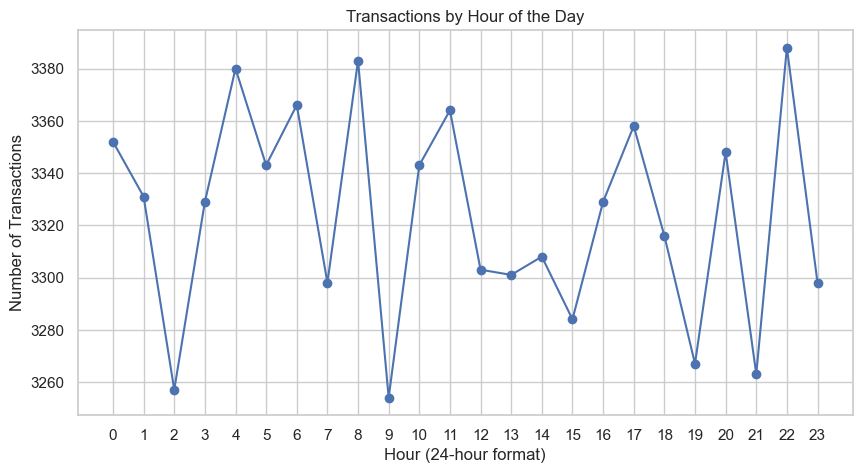

In [280]:
# Extract hour from timestamp
transactions['transaction_hour'] = transactions['transaction_date'].dt.hour

# Create hourly summary
hourly_summary = transactions['transaction_hour'].value_counts().sort_index().reset_index()
hourly_summary.columns = ['hour_of_day', 'transaction_count']

# Display table
print("📋 Transactions by Hour of the Day:")
display(hourly_summary)

# Plot
plt.figure(figsize=(10,5))
plt.plot(hourly_summary['hour_of_day'], hourly_summary['transaction_count'], marker='o', linestyle='-')
plt.title('Transactions by Hour of the Day')
plt.xlabel('Hour (24-hour format)')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

## Churn

In [282]:
# View the first few rows of churn
churn.head()

,customer_id,total_orders,days_since_last_purchase,last_purchase_date
0,1,8,39,2025-02-10 11:32:00
1,2,8,117,2024-11-25 10:58:00
2,3,14,7,2025-03-14 23:09:00
3,4,5,28,2025-02-21 12:10:00
4,5,7,112,2024-11-29 22:16:00


In [283]:
# shape of data
churn.shape

(9994, 4)

In [284]:
# info of churn DataFrame
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_id               9994 non-null   int64         
 1   total_orders              9994 non-null   int64         
 2   days_since_last_purchase  9994 non-null   int64         
 3   last_purchase_date        9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 312.4 KB


In [285]:
# numerical columns statistics
churn.describe(include=['number']).T

,count,mean,std,min,25%,50%,75%,max
customer_id,9994.0,4999.745447,2886.724019,1.0,2500.25,4999.5,7498.75,10000.0
total_orders,9994.0,8.004603,2.841061,1.0,6.00,8.0,10.00,21.0
days_since_last_purchase,9994.0,48.223134,45.319317,3.0,16.00,34.0,66.00,365.0


In [286]:
# categorical columns statistics
churn.describe(exclude=['number']).T

,count,mean,min,25%,50%,75%,max
last_purchase_date,9994,2025-02-01 18:10:22.027216128,2024-03-22 08:26:00,2025-01-14 17:31:30,2025-02-15 14:53:30,2025-03-06 01:04:45,2025-03-19 08:56:00


In [287]:
# Checking for missing values
churn.isna().sum()

customer_id                 0
total_orders                0
days_since_last_purchase    0
last_purchase_date          0
dtype: int64

In [288]:
# Checking for duplicates in the data
churn.duplicated().sum()

0


=== churn Numerical Columns Univariate Distributions ===


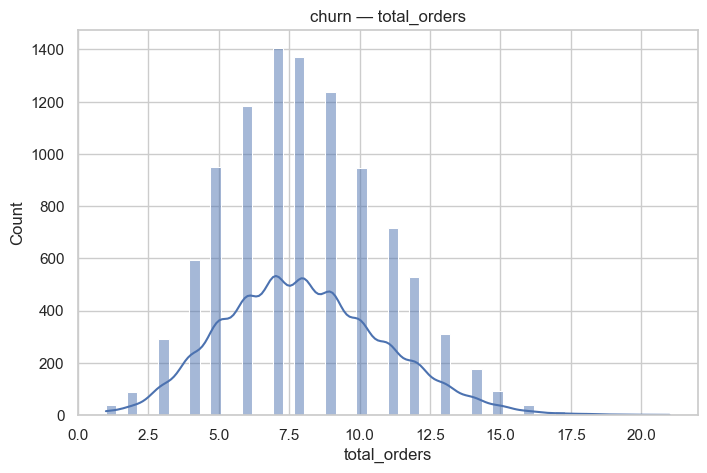

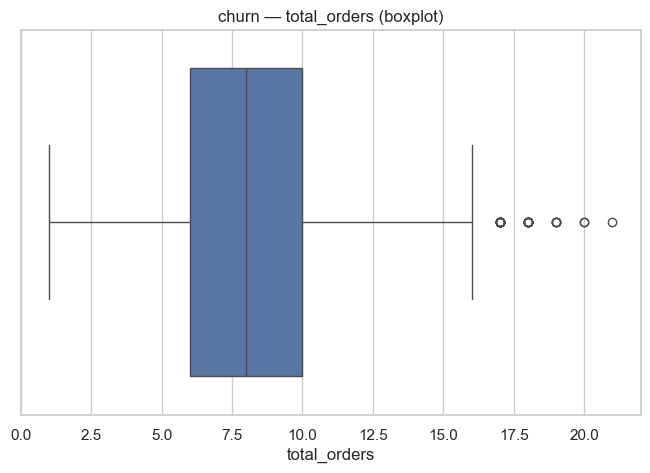

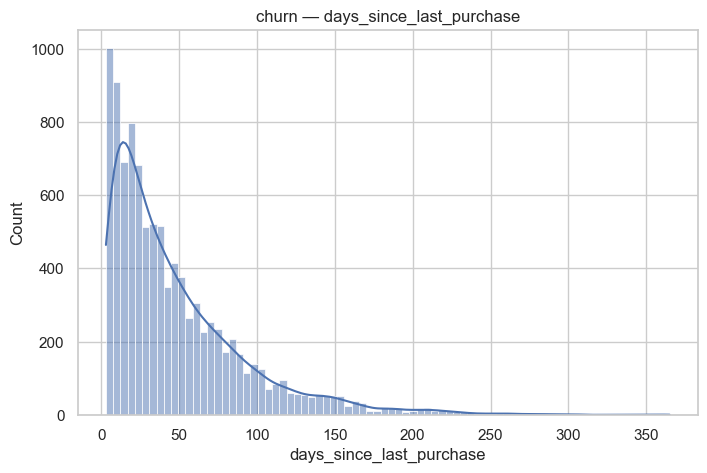

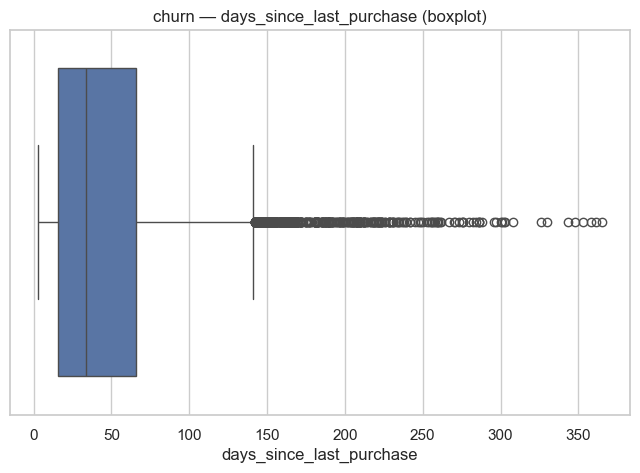

In [289]:
name = 'churn'
print(f"\n=== {name} Numerical Columns Univariate Distributions ===")
for c in ['total_orders', 'days_since_last_purchase']:
    plt.figure(figsize=(8,5))
    sns.histplot(churn[c], kde=True).set_title(f"{name} — {c}")
    plt.show()
    plt.figure(figsize=(8,5))
    sns.boxplot(x=churn[c]).set_title(f"{name} — {c} (boxplot)")
    plt.show()

Earliest Purchase Date: 2024-03-22 08:26:00
Latest Purchase Date: 2025-03-19 08:56:00
Total Unique Purchase Dates: 9628




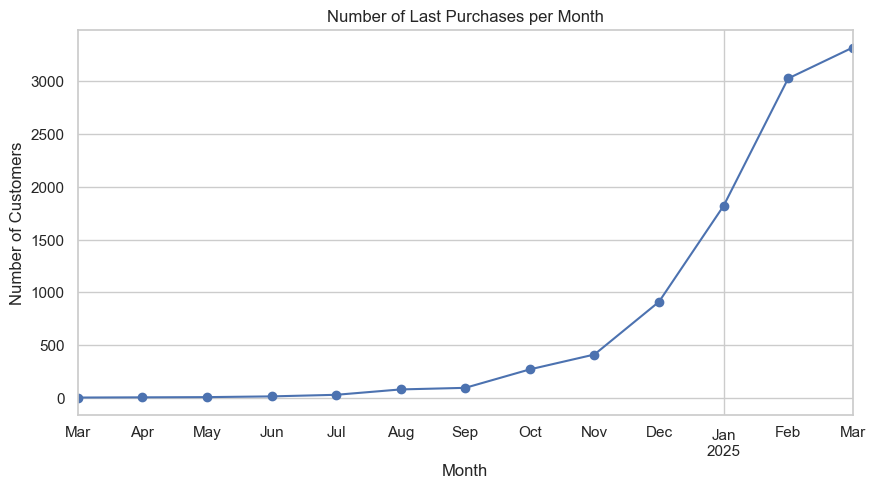

In [290]:
#Exploring the basic date stats for last_purchase_date
print("Earliest Purchase Date:", churn['last_purchase_date'].min())
print("Latest Purchase Date:", churn['last_purchase_date'].max())
print("Total Unique Purchase Dates:", churn['last_purchase_date'].nunique())
print('\n')

# Plot number of last purchases over months
churn.set_index('last_purchase_date').resample('ME').size().plot(marker='o', figsize=(10,5))
plt.title('Number of Last Purchases per Month')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

## Session_events

In [292]:
# View the first few rows of session_events
session_events.head()

,session_id,customer_id,event_type,timestamp
0,2,3826,visit,2024-04-06 21:34:00
1,3,9581,visit,2024-09-15 00:51:00
2,4,3218,visit,2024-12-14 04:22:00
3,5,6234,visit,2024-06-28 09:16:00
4,5,6234,add_to_cart,2024-06-28 09:25:00


In [293]:
# shape of data
session_events.shape

(242333, 4)

In [294]:
# info of session_events DataFrame
session_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242333 entries, 0 to 242332
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   session_id   242333 non-null  int64         
 1   customer_id  242333 non-null  int64         
 2   event_type   242333 non-null  object        
 3   timestamp    242333 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.4+ MB


In [295]:
# Changing session_id and customer_id data types to string
# session_events['session_id'] = session_events['session_id'].astype(str)
# session_events['customer_id'] = session_events['customer_id'].astype(str)

In [296]:
# categorical columns statistics
session_events.describe(exclude=['number']).T

,count,unique,top,freq,mean,min,25%,50%,75%,max
event_type,242333,4,visit,118144,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,242333,NaN,NaN,NaN,2024-09-17 14:36:01.313234432,2024-03-19 03:19:00,2024-06-18 06:09:00,2024-09-17 07:43:00,2024-12-17 15:48:00,2025-03-19 09:51:00


In [297]:
# Checking for missing values
session_events.isna().sum()

session_id     0
customer_id    0
event_type     0
timestamp      0
dtype: int64

In [298]:
# Checking for duplicates in the data
session_events.duplicated().sum()

0

In [299]:
# Unique event types
print("\nUnique Event Types and Counts:")
print(session_events['event_type'].value_counts())


Unique Event Types and Counts:
event_type
visit          118144
add_to_cart     60486
checkout        36252
purchase        27451
Name: count, dtype: int64


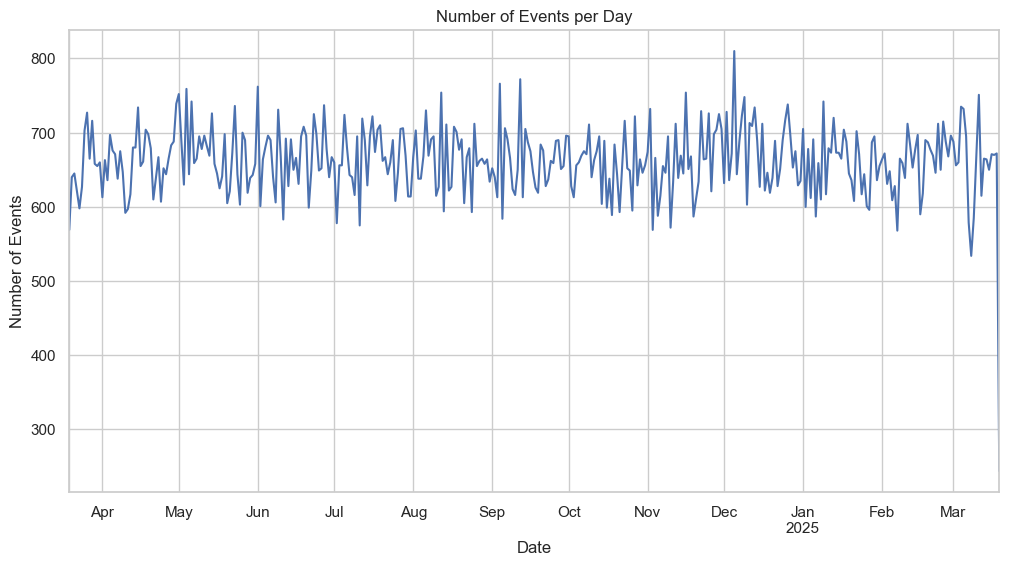

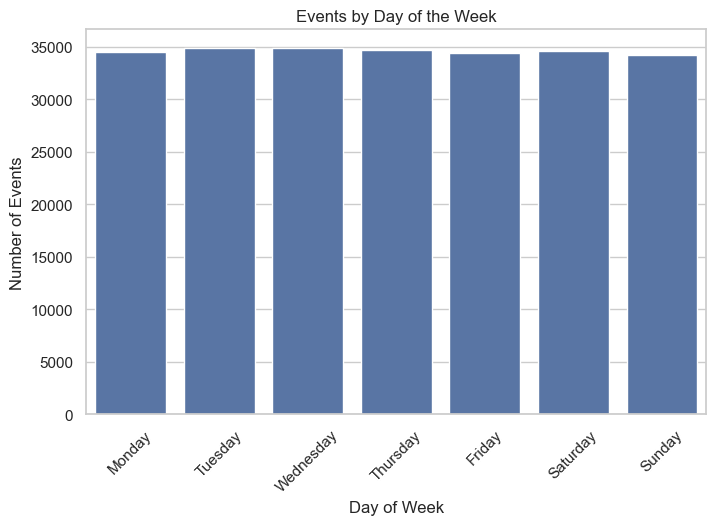

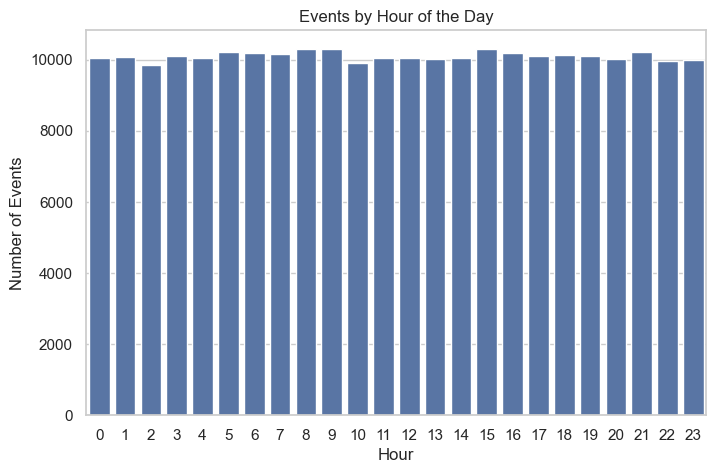

In [300]:
# Events per day
events_per_day = session_events.set_index('timestamp').resample('D').size()
plt.figure(figsize=(12,6))
events_per_day.plot()
plt.title('Number of Events per Day')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.grid(True)
plt.show()

# Events by Day of Week
session_events['day_of_week'] = session_events['timestamp'].dt.day_name()
plt.figure(figsize=(8,5))
sns.countplot(data=session_events, x='day_of_week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Events by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.show()

# Events by Hour of Day
session_events['hour_of_day'] = session_events['timestamp'].dt.hour
plt.figure(figsize=(8,5))
sns.countplot(data=session_events, x='hour_of_day')
plt.title('Events by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Events')
plt.show()

## Feature Engineering

In [302]:
# Total number of transactions per customer
txns_per_customer = transactions.groupby('customer_id').transaction_id.count()

print('Maximum transactions per customer: ', txns_per_customer.max())
print('Maximum transactions per customer: ', txns_per_customer.min())
print(txns_per_customer.describe())

Maximum transactions per customer:  22
Maximum transactions per customer:  1
count    9994.000000
mean        7.981089
std         2.832306
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        22.000000
Name: transaction_id, dtype: float64


                   Number of Customers
Transaction Range                     
1-5                               1965
6-10                              6178
11-15                             1782
16-20                               67


<Figure size 1000x600 with 0 Axes>

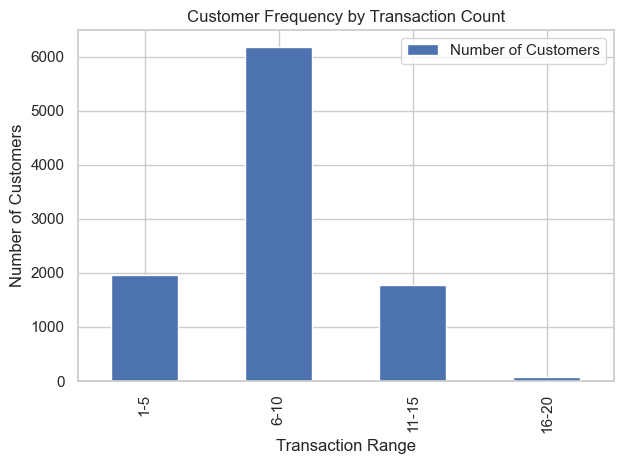

In [303]:
bins = [0, 5, 10, 15, 20] 
labels = ['1-5', '6-10', '11-15', '16-20'] 

# Creating binned values
binned_transactions = pd.cut(txns_per_customer, bins=bins, labels=labels, right=True)

# Creating frequency table
frequency_table = pd.crosstab(index=binned_transactions, columns="count")
frequency_table.columns = ['Number of Customers']
frequency_table.index.name = 'Transaction Range'

# Print the frequency table
print(frequency_table)

# Creating a bar chart
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar')
plt.title('Customer Frequency by Transaction Count')
plt.xlabel('Transaction Range')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [304]:
transactions.head()

,transaction_id,customer_id,purchase_amount,product_category,payment_method,transaction_date,day_of_week,transaction_hour
0,1,5143,27819.68,Electronics,UPI,2024-12-28 22:48:00,Saturday,22
1,2,3756,20823.74,Electronics,Credit Card,2024-10-06 09:46:00,Sunday,9
2,3,9992,20699.54,Electronics,Credit Card,2024-05-19 23:58:00,Sunday,23
3,4,4686,37018.61,Premium Home Decor,UPI,2024-08-24 03:56:00,Saturday,3
4,5,4709,2947.41,Premium Home Decor,UPI,2024-11-25 08:35:00,Monday,8


In [305]:
# Total Revenue
revenue_per_customer = transactions.groupby('customer_id')['purchase_amount'].sum()

print('Maximum Revenue per Customer: ', revenue_per_customer.max())
print('Minimum Revenue per Customer: ', revenue_per_customer.min())
revenue_per_customer.describe()

Maximum Revenue per Customer:  586708.35
Minimum Revenue per Customer:  300.0


count      9994.000000
mean     149862.310989
std      109338.533176
min         300.000000
25%       50758.562500
50%      151129.645000
75%      230398.205000
max      586708.350000
Name: purchase_amount, dtype: float64

                   Number of Customers
Transaction Range                     
1-100000                          3758
100001-200000                     2793
200001-300000                     2496
300001-400000                      838
400001-500000                       99
500001-600000                       10


<Figure size 1000x600 with 0 Axes>

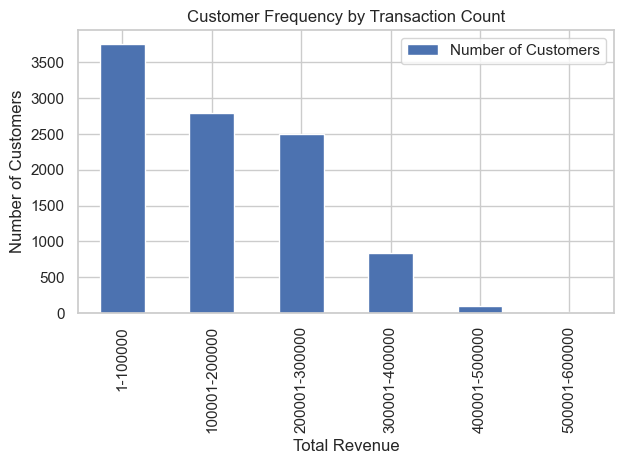

In [306]:
# Creating bins and labels
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000] 
labels = ['1-100000', '100001-200000', '200001-300000', '300001-400000', '400001-500000', '500001-600000'] 

# Creating binned values
binned_transactions = pd.cut(revenue_per_customer, bins=bins, labels=labels, right=True)

binned_transactions.head()

# Creating frequency table
frequency_table = pd.crosstab(index=binned_transactions, columns="count")
frequency_table.columns = ['Number of Customers']
frequency_table.index.name = 'Transaction Range'

# Print the frequency table
print(frequency_table)

# Creating a bar chart
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar')
plt.title('Customer Frequency by Transaction Count')
plt.xlabel('Total Revenue')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [307]:
# Average Transaction Value per Customer
average_txn_value_per_customer = transactions.groupby('customer_id').purchase_amount.mean()

average_txn_value_per_customer.describe()

count     9994.000000
mean     18139.605469
std      11379.249118
min        300.000000
25%       7107.777313
50%      22082.182143
75%      27106.166465
max      49795.690000
Name: purchase_amount, dtype: float64

                   Number of Customers
Transaction Range                     
1-10000                           1455
10001-20000                        244
20001-30000                        328
30001-40000                        238
40001-50000                        215


<Figure size 1000x600 with 0 Axes>

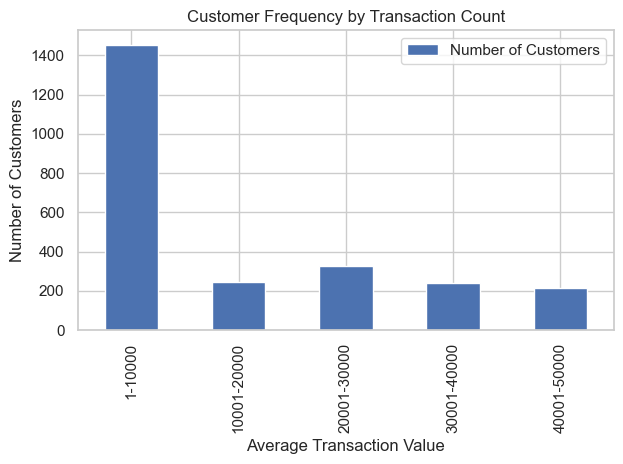

In [308]:
# Creaing bins and labels
bins = [0, 10000, 20000, 30000, 40000, 50000] 
labels = ['1-10000', '10001-20000', '20001-30000', '30001-40000', '40001-50000'] 

# Creating binned values
binned_transactions = pd.cut(revenue_per_customer, bins=bins, labels=labels, right=True)

binned_transactions.head()

# Creating frequency table
frequency_table = pd.crosstab(index=binned_transactions, columns="count")
frequency_table.columns = ['Number of Customers']
frequency_table.index.name = 'Transaction Range'

# Print the frequency table
print(frequency_table)

# Creating a bar chart
plt.figure(figsize=(10, 6))
frequency_table.plot(kind='bar')
plt.title('Customer Frequency by Transaction Count')
plt.xlabel('Average Transaction Value')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [309]:
# Creating churn label to show customers who haven't purchase in last 90 days.
churn['churned'] = [1 if days > 90 else 0 for days in churn['days_since_last_purchase']]

# Firt 5 rows of churn
churn.head()

,customer_id,total_orders,days_since_last_purchase,last_purchase_date,churned
0,1,8,39,2025-02-10 11:32:00,0
1,2,8,117,2024-11-25 10:58:00,1
2,3,14,7,2025-03-14 23:09:00,0
3,4,5,28,2025-02-21 12:10:00,0
4,5,7,112,2024-11-29 22:16:00,1


In [310]:
# Found a customer with id 10310 that is not present in customers table.

# Checking more about this
customer_id_na_session = session_events[~session_events['customer_id'].isin(customers['customer_id'].unique())].customer_id.unique()

print(customer_id_na_session)

[3889  371 4962 5687  172 7914 2914 4311 3969 3103  418  114 3334 1408
 4577 4069 7125 3929 3975 5360 2305 2633 7280 1181 3241 6623  736 1204
 4416 6373 4768 4667 7306 5191 2446 7011 2582 9466 9544 3909  214 7053
 3580  964 3392  252 9754  294 7281  960 2137 5706 7319 6478 2964 9392
 4283 8895 3073 1351 5571 8428 6046 4291  835 6872 6413 7000 3992 3102
 9011  672 9811 7348 5082 7432 3277 5906  798  849 7923 2840 8818 3348
 5580 1254 1792 9315 9566 6703 7688  908 6811 2345 3738 1471  907  198
 3798 2147 4429 8938 6711]


We will remove the customers_id data from session_events table that we don't have in customers table because we don't have any customer demographics for these users.

In [312]:
# Removing customer_id data from session_events DataFrame not available in customers table
session_events = session_events[~session_events['customer_id'].isin(customer_id_na_session)]

In [313]:
# Checking if customer_id are all available in Churn DataFrame or not.
churn_customer_id_na = churn[~churn['customer_id'].isin(customers['customer_id'].unique())].customer_id.unique()

print(churn_customer_id_na[:10])

[114 172 198 214 252 294 371 418 672 736]


In [314]:
# Removing customer_id data from churn DataFrame not available in customers table
churn = churn[~churn['customer_id'].isin(churn_customer_id_na)]

In [315]:
# Creating series with number of sessions per customer data
sessions_per_customer = session_events.groupby('customer_id')['session_id'].nunique()

print(sessions_per_customer)

customer_id
1       14
2        7
3       18
4        8
5       17
        ..
9989     8
9990    10
9991    11
9992    14
9993    12
Name: session_id, Length: 9890, dtype: int64


In [316]:
# Creating DataFrame with number of sessions per customer data
event_counts = session_events.groupby('customer_id')['event_type'].value_counts().unstack(fill_value=0)

print(event_counts)

event_type   add_to_cart  checkout  purchase  visit
customer_id                                        
1                      5         0         0     14
2                      4         1         1      7
3                      7         3         2     18
4                      5         4         3      8
5                     11         8         3     17
...                  ...       ...       ...    ...
9989                   4         3         2      8
9990                   5         3         3     10
9991                   5         3         2     11
9992                  10         7         4     14
9993                   7         3         2     12

[9890 rows x 4 columns]


# Funnel Analysis

In [318]:
funnel = (
    session_events.groupby('event_type')['customer_id']
    .nunique()
    .reindex(['visit', 'add_to_cart', 'checkout', 'purchase'])  # preserve order
)

funnel_df = funnel.reset_index()
funnel_df.columns = ['Stage', 'Unique Users']
funnel_df['Conversion (%)'] = funnel_df['Unique Users'] / funnel_df.loc[0, 'Unique Users'] * 100

print(funnel_df)


         Stage  Unique Users  Conversion (%)
0        visit          9890      100.000000
1  add_to_cart          9869       99.787664
2     checkout          9618       97.249747
3     purchase          9229       93.316481


In [319]:
funnel_data = session_events.groupby('event_type')['session_id'].nunique().reindex(['visit', 'add_to_cart', 'checkout', 'purchase'])

print(funnel_data)


event_type
visit          116944
add_to_cart     59882
checkout        35906
purchase        27182
Name: session_id, dtype: int64


In [320]:
# Step 1: Create flags for each event in session
funnel_flags = session_events.pivot_table(index='session_id',
                                          columns='event_type',
                                          values='timestamp',
                                          aggfunc='min').notna().astype(int)

# Step 2: Count how many sessions had each event
funnel_counts = funnel_flags.sum().reindex(['visit', 'add_to_cart', 'checkout', 'purchase'])

print(funnel_counts)


event_type
visit          116944
add_to_cart     59882
checkout        35906
purchase        27182
dtype: int64


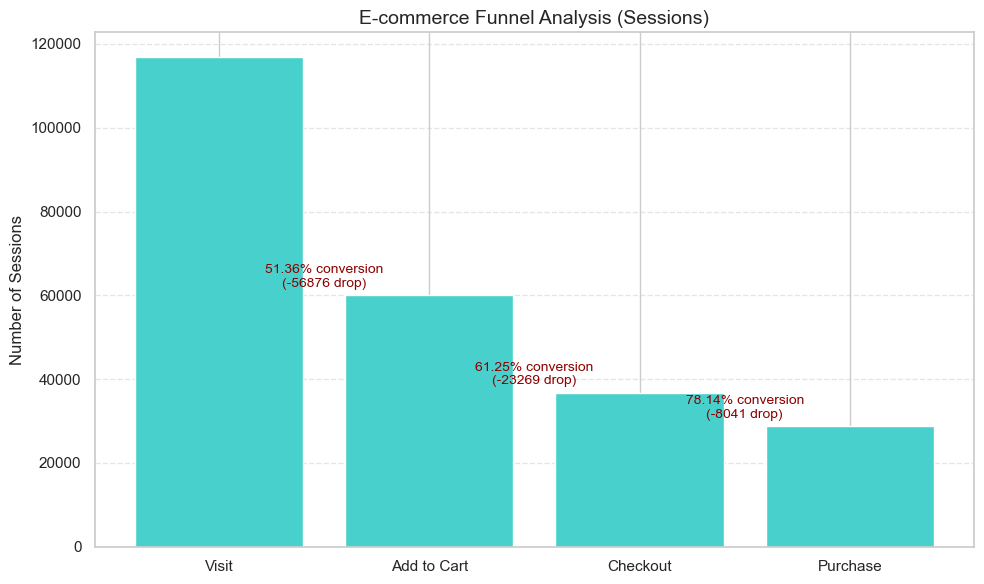

In [321]:
import matplotlib.pyplot as plt

# Stage data
stages = ['Visit', 'Add to Cart', 'Checkout', 'Purchase']
values = [116923, 60047, 36778, 28737]

# Conversion rates and drop-offs
conversion_rates = [round(values[i+1] / values[i] * 100, 2) for i in range(len(values)-1)]
drop_offs = [values[i] - values[i+1] for i in range(len(values)-1)]

# Plotting funnel
plt.figure(figsize=(10,6))
bars = plt.bar(stages, values, color='mediumturquoise')

# Annotating conversion rate and drop-offs
for i in range(len(conversion_rates)):
    plt.text(i + 0.5, values[i+1] + 2000, 
             f'{conversion_rates[i]}% conversion\n(-{drop_offs[i]} drop)', 
             ha='center', fontsize=10, color='darkred')

plt.title('E-commerce Funnel Analysis (Sessions)', fontsize=14)
plt.ylabel('Number of Sessions')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [322]:
import pandas as pd

# Step 1: Aggregate unique session counts per funnel stage
funnel_data = session_events.groupby('event_type')['session_id'].nunique()
funnel_data = funnel_data.reindex(['visit', 'add_to_cart', 'checkout', 'purchase'])

# Step 2: Create DataFrame to hold funnel and conversion calculations
funnel_df = pd.DataFrame({
    'Stage': funnel_data.index,
    'Unique Sessions': funnel_data.values
})

# Step 3: Calculate conversion rates
funnel_df['Conversion from Previous (%)'] = funnel_df['Unique Sessions'].pct_change().fillna(0).add(1).mul(100).round(2)
funnel_df.loc[0, 'Conversion from Previous (%)'] = 100.0  # First step is 100%

funnel_df['Conversion from First Stage (%)'] = funnel_df['Unique Sessions'].div(funnel_df['Unique Sessions'].iloc[0]).mul(100).round(2)

# Step 4: Display final funnel metrics
funnel_df


,Stage,Unique Sessions,Conversion from Previous (%),Conversion from First Stage (%)
0,visit,116944,100.00,100.00
1,add_to_cart,59882,51.21,51.21
2,checkout,35906,59.96,30.70
3,purchase,27182,75.70,23.24


# Churn

In [324]:
churn.head()

,customer_id,total_orders,days_since_last_purchase,last_purchase_date,churned
0,1,8,39,2025-02-10 11:32:00,0
1,2,8,117,2024-11-25 10:58:00,1
2,3,14,7,2025-03-14 23:09:00,0
3,4,5,28,2025-02-21 12:10:00,0
4,5,7,112,2024-11-29 22:16:00,1


In [325]:
# Split into churned and retained IDs
churned_ids = churn[churn['churned'] == 1]['customer_id']
retained_ids = churn[churn['churned'] == 0]['customer_id']

In [326]:
# Churned transactions
transactions_churned = transactions[transactions['customer_id'].isin(churned_ids)]

# Retained transactions
transactions_retained = transactions[transactions['customer_id'].isin(retained_ids)]


In [327]:
# Churned session events
sessions_churned = session_events[session_events['customer_id'].isin(churned_ids)]

# Retained session events
sessions_retained = session_events[session_events['customer_id'].isin(retained_ids)]


In [328]:
# Churned customers
customers_churned = customers[customers['customer_id'].isin(churned_ids)]

# Retained customers
customers_retained = customers[customers['customer_id'].isin(retained_ids)]

## Customers churned

In [330]:
# Making list of churned and retained customer ids
churned_custid = churn[churn['churned'] == 1]['customer_id'].to_list()
retained_custid = churn[churn['churned'] == 0]['customer_id'].to_list()

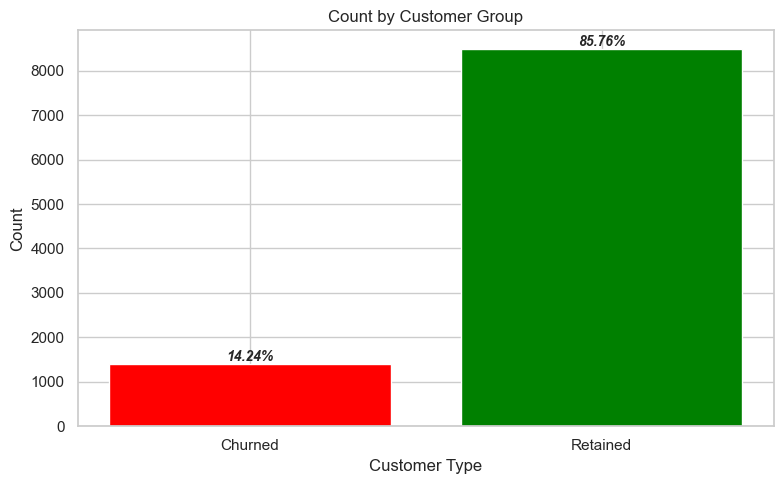

In [331]:
# Count of Customers
count_churned = len(churned_custid)
count_retained = len(retained_custid)

labels = ['Churned', 'Retained']
values = [count_churned, count_retained]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.title('Count by Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height/churn.shape[0]*100:,.2f}%', ha='center', va='bottom', fontsize=10, style='italic', fontweight='bold')

plt.tight_layout()
plt.show()

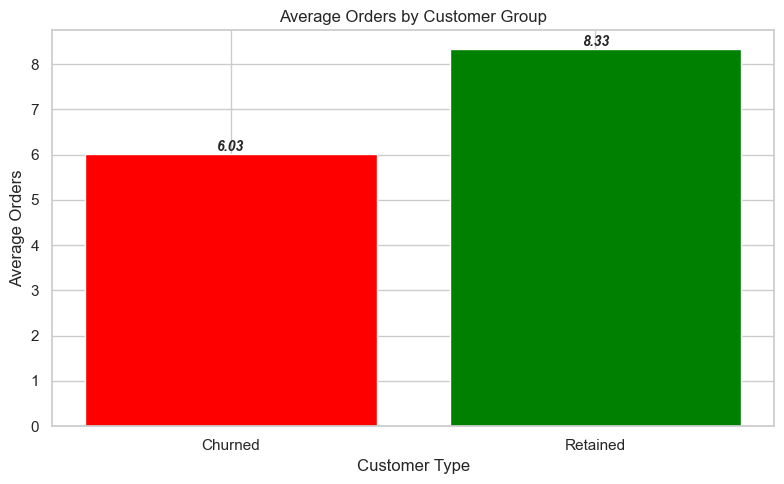

In [332]:
# Average orders
avg_orders_churned = churn[churn['churned'] == 1]['total_orders'].mean()
avg_orders_retained = churn[churn['churned'] == 0]['total_orders'].mean()


labels = ['Churned', 'Retained']
values = [avg_orders_churned, avg_orders_retained]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Orders')
plt.title('Average Orders by Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, style='italic', fontweight='bold')

plt.tight_layout()
plt.show()

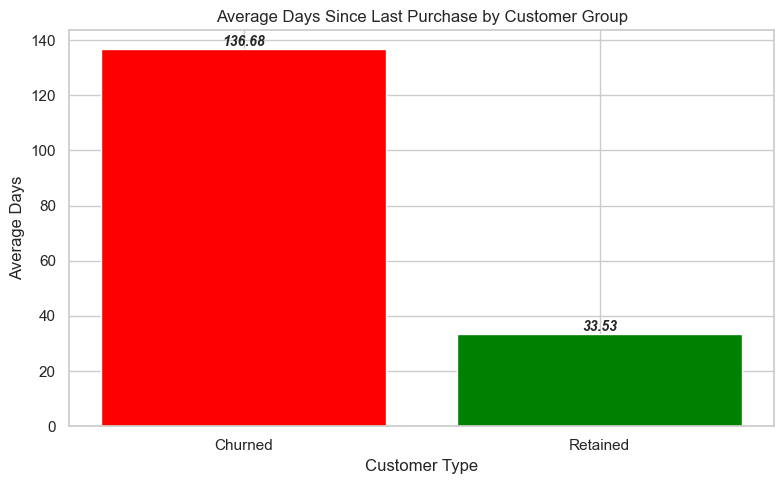

In [333]:
# Days Since Last Purchase
avg_days_purchase_churned = churn[churn['churned'] == 1]['days_since_last_purchase'].mean()
avg_days_purchase_retained = churn[churn['churned'] == 0]['days_since_last_purchase'].mean()


labels = ['Churned', 'Retained']
values = [avg_days_purchase_churned, avg_days_purchase_retained]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Days')
plt.title('Average Days Since Last Purchase by Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, style='italic', fontweight='bold')

plt.tight_layout()
plt.show()

In [334]:
# Subsetting customers based on status
customers_churned = customers[customers['customer_id'].isin(churned_custid)]
customers_retained = customers[~customers['customer_id'].isin(churned_custid)]

In [335]:
# Print first 5 rows of churned customers
customers_churned.head()

,customer_id,full_name,age,city,gender,state,yearly_income,education,occupation
1,2,Vritika Agarwal,64,Hyderabad,Female,Telangana,854908.0,MSc,Finance Manager
4,5,Pari Dave,45,Bangalore,Male,Karnataka,2405385.0,PhD,Doctor
9,11,Shanaya Ghose,36,Bangalore,Male,Karnataka,1238531.0,MSc,Doctor
11,13,Ehsaan Samra,25,Mumbai,Male,Maharashtra,1744550.0,MBA,Entrepreneur
20,24,Samarth Sanghvi,18,Mumbai,Male,Maharashtra,955028.0,M.Tech,Finance Manager


In [336]:
# Print first 5 rows of retained customers
customers_retained.head()

,customer_id,full_name,age,city,gender,state,yearly_income,education,occupation
0,1,Indrans Roy,36,Delhi,Male,Delhi,958214.0,MBA,Finance Manager
2,3,Rohan Ghose,22,Hyderabad,Male,Telangana,2993630.0,MSc,Finance Manager
3,4,Ehsaan Buch,32,Hyderabad,Male,Telangana,790845.0,B.A,Teacher
5,6,Aradhya Krishnan,18,Chennai,Male,Tamil Nadu,1101848.0,MBA,Entrepreneur
6,7,Aaryahi Bhavsar,43,Bangalore,Female,Karnataka,664866.0,BSc,Accountant


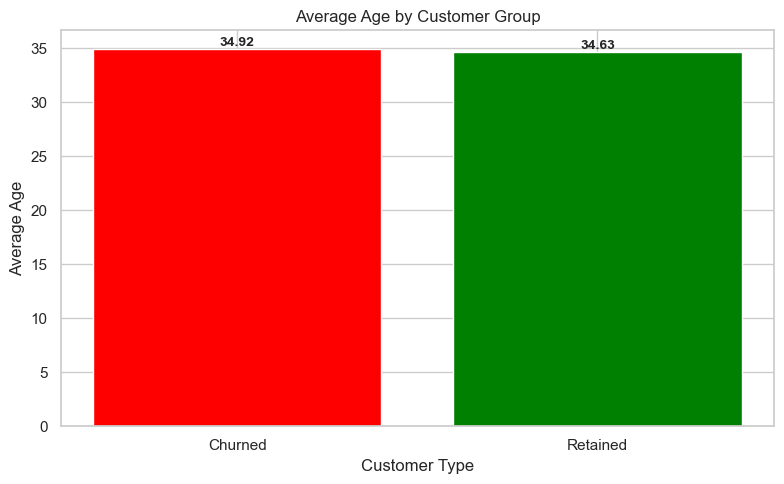

In [337]:
# Average age
labels = ['Churned', 'Retained']
values = [customers_churned['age'].mean(), customers_retained['age'].mean()]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Age')
plt.title('Average Age by Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

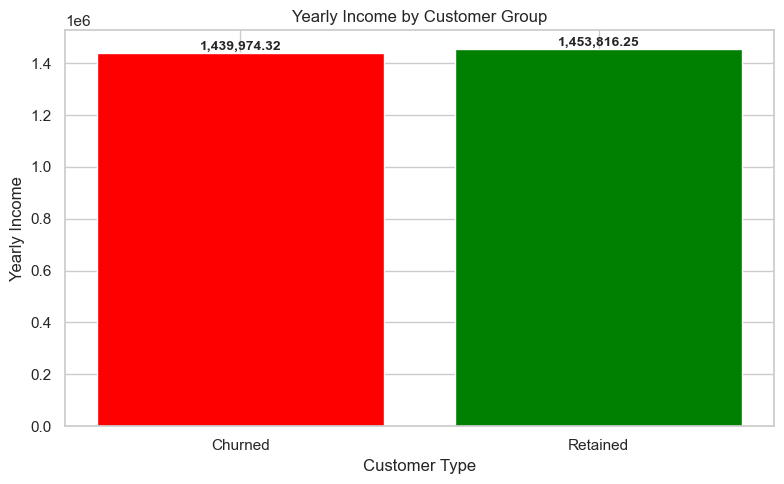

In [338]:
# Yearly Income
labels = ['Churned', 'Retained']
values = [customers_churned['yearly_income'].mean(), customers_retained['yearly_income'].mean()]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Yearly Income')
plt.title('Yearly Income by Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

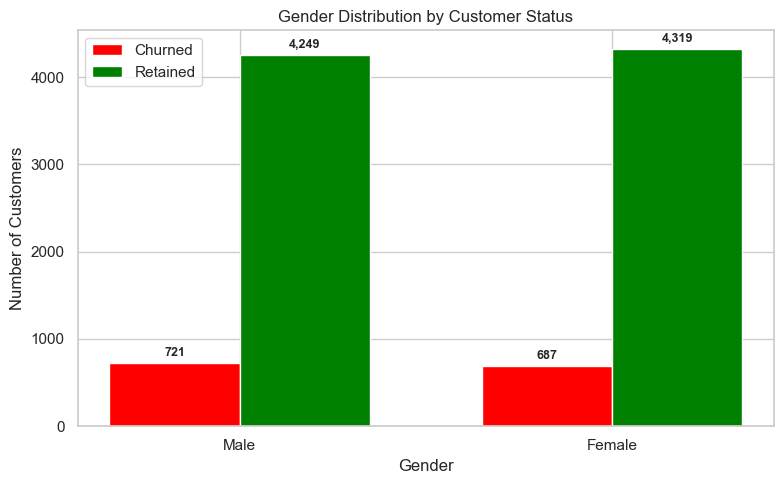

In [339]:
# Gender Counts
churned_gender_counts = customers_churned['gender'].value_counts()
retained_gender_counts = customers_retained['gender'].value_counts()

churned_male = churned_gender_counts.get('Male', 0)
churned_female = churned_gender_counts.get('Female', 0)
retained_male = retained_gender_counts.get('Male', 0)
retained_female = retained_gender_counts.get('Female', 0)

# Prepare data
labels = ['Male', 'Female']
churned_values = [churned_male, churned_female]
retained_values = [retained_male, retained_female]

x = range(len(labels))  # [0, 1]
width = 0.35

# Plot
plt.figure(figsize=(8, 5))
bars1 = plt.bar([i - width/2 for i in x], churned_values, width=width, label='Churned', color='red')
bars2 = plt.bar([i + width/2 for i in x], retained_values, width=width, label='Retained', color='green')

# Labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title('Gender Distribution by Customer Status')
plt.xticks(ticks=x, labels=labels)
plt.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 50,
                 f'{height:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [340]:
# Creating a function that get the data
def get_plot_data(churned_df, retained_df, column_name):
    i_list = churned_df[column_name].value_counts().index  # Get largest value index first from churned
    churned_data = []
    retained_data = []

    for value in i_list:
        churned_data.append(churned_df[column_name].value_counts().get(value))
        retained_data.append(retained_df[column_name].value_counts().get(value))

    return i_list, churned_data, retained_data

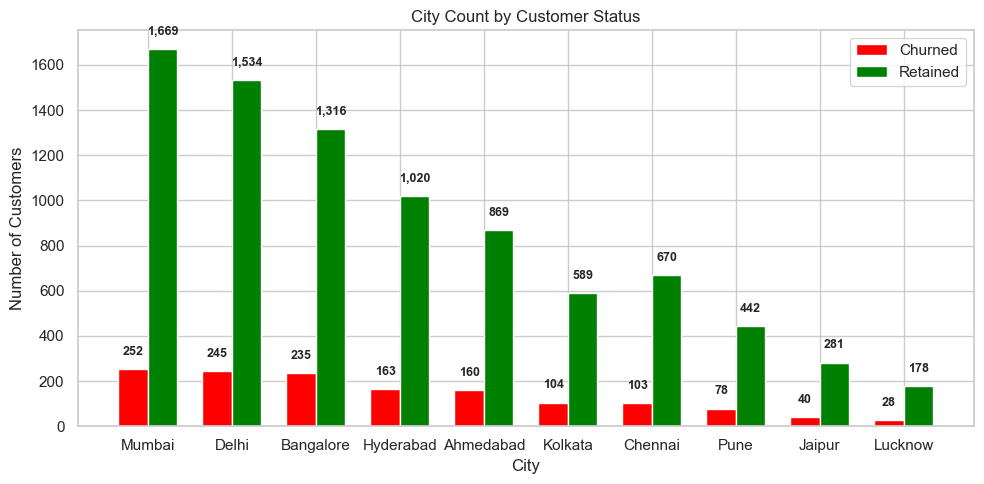

In [341]:
# City Counts
columns_labels, churned_data, retained_date = get_plot_data(customers_churned, customers_retained, 'city')

# Prepare data
labels = columns_labels
churned_values = churned_data
retained_values = retained_date

x = range(len(labels))  # [0, 1, ..]
width = 0.35

# Plot
plt.figure(figsize=(10, 5))
bars1 = plt.bar([i - width/2 for i in x], churned_values, width=width, label='Churned', color='red')
bars2 = plt.bar([i + width/2 for i in x], retained_values, width=width, label='Retained', color='green')

# Labels and title
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('City Count by Customer Status')
plt.xticks(ticks=x, labels=labels)
plt.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 50,
                 f'{height:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

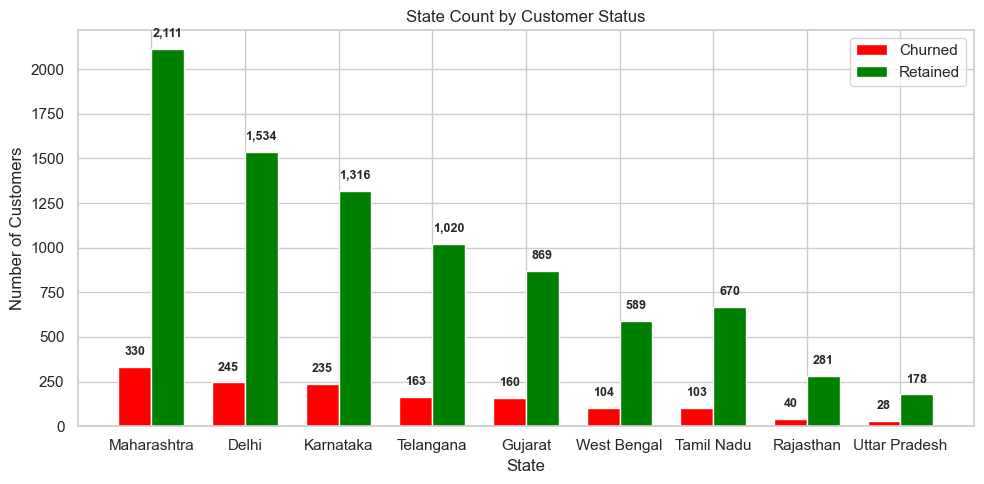

In [342]:
# State Counts
columns_labels, churned_data, retained_date = get_plot_data(customers_churned, customers_retained, 'state')

# Prepare data
labels = columns_labels
churned_values = churned_data
retained_values = retained_date

x = range(len(labels))  # [0, 1, ..]
width = 0.35

# Plot
plt.figure(figsize=(10, 5))
bars1 = plt.bar([i - width/2 for i in x], churned_values, width=width, label='Churned', color='red')
bars2 = plt.bar([i + width/2 for i in x], retained_values, width=width, label='Retained', color='green')

# Labels and title
plt.xlabel('State')
plt.ylabel('Number of Customers')
plt.title('State Count by Customer Status')
plt.xticks(ticks=x, labels=labels)
plt.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 50,
                 f'{height:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

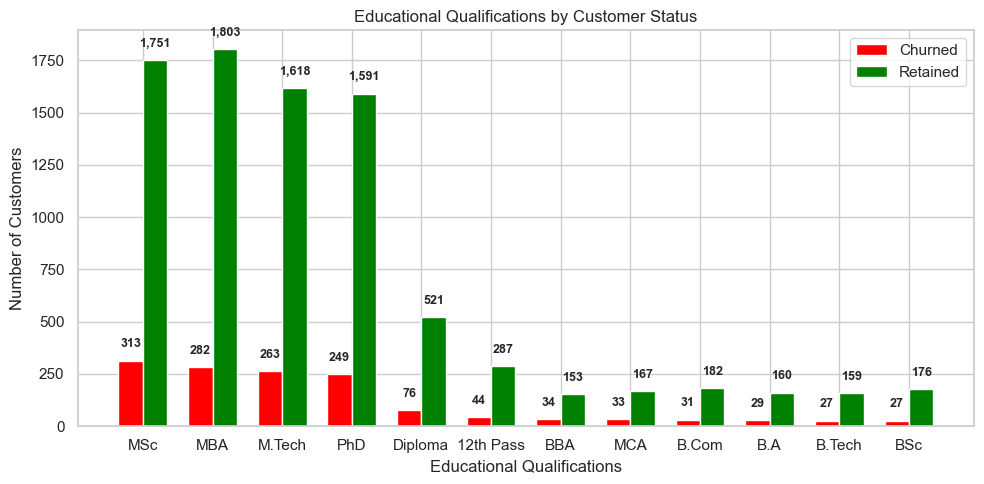

In [343]:
# Education
columns_labels, churned_data, retained_date = get_plot_data(customers_churned, customers_retained, 'education')

# Prepare data
labels = columns_labels
churned_values = churned_data
retained_values = retained_date

x = range(len(labels))  # [0, 1, ..]
width = 0.35

# Plot
plt.figure(figsize=(10, 5))
bars1 = plt.bar([i - width/2 for i in x], churned_values, width=width, label='Churned', color='red')
bars2 = plt.bar([i + width/2 for i in x], retained_values, width=width, label='Retained', color='green')

# Labels and title
plt.xlabel('Educational Qualifications')
plt.ylabel('Number of Customers')
plt.title('Educational Qualifications by Customer Status')
plt.xticks(ticks=x, labels=labels)
plt.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 50,
                 f'{height:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

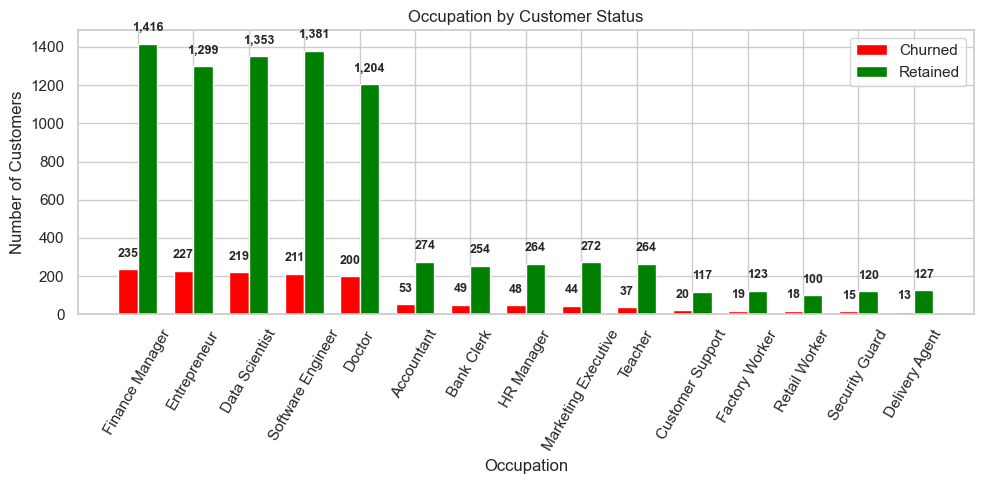

In [344]:
# Occupation
columns_labels, churned_data, retained_date = get_plot_data(customers_churned, customers_retained, 'occupation')

# Prepare data
labels = columns_labels
churned_values = churned_data
retained_values = retained_date

x = range(len(labels))  # [0, 1, ..]
width = 0.35

# Plot
plt.figure(figsize=(10, 5))
bars1 = plt.bar([i - width/2 for i in x], churned_values, width=width, label='Churned', color='red')
bars2 = plt.bar([i + width/2 for i in x], retained_values, width=width, label='Retained', color='green')

# Labels and title
plt.xlabel('Occupation')
plt.ylabel('Number of Customers')
plt.title('Occupation by Customer Status')
plt.xticks(ticks=x, labels=labels, rotation=60)
plt.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 50,
                 f'{height:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [345]:
# Subsetting transactions based on customers status
transactions_churned = transactions[transactions['customer_id'].isin(churned_custid)]
transactions_retained = transactions[transactions['customer_id'].isin(retained_custid)]

In [346]:
# First 5 rows of churned customer transactions
transactions_churned.head()

,transaction_id,customer_id,purchase_amount,product_category,payment_method,transaction_date,day_of_week,transaction_hour
8,9,5228,325.54,Luxury Fashion,Credit Card,2024-08-02 05:34:00,Friday,5
12,13,5148,300.00,Books,Cash,2024-04-17 07:53:00,Wednesday,7
30,31,5016,384.01,Luxury Fashion,Credit Card,2024-08-21 21:53:00,Wednesday,21
31,32,3207,695.94,Electronics,Credit Card,2024-10-31 18:24:00,Thursday,18
37,38,4176,300.00,Premium Home Decor,Credit Card,2024-12-01 01:04:00,Sunday,1


In [347]:
# First 5 rows of retained customer transactions
transactions_retained.head()

,transaction_id,customer_id,purchase_amount,product_category,payment_method,transaction_date,day_of_week,transaction_hour
0,1,5143,27819.68,Electronics,UPI,2024-12-28 22:48:00,Saturday,22
1,2,3756,20823.74,Electronics,Credit Card,2024-10-06 09:46:00,Sunday,9
2,3,9992,20699.54,Electronics,Credit Card,2024-05-19 23:58:00,Sunday,23
3,4,4686,37018.61,Premium Home Decor,UPI,2024-08-24 03:56:00,Saturday,3
4,5,4709,2947.41,Premium Home Decor,UPI,2024-11-25 08:35:00,Monday,8


In [348]:
from datetime import datetime

# Creating transactions customer level data for churned customers
# Aggregate per customer
transactions_churned_agg = transactions_churned.groupby('customer_id').agg(
    num_transactions=('transaction_id', 'count'),
    total_purchase_amount=('purchase_amount', 'sum'),
    avg_purchase_amount=('purchase_amount', 'mean'),
    first_txn=('transaction_date', 'min'),
    last_txn=('transaction_date', 'max'),
    unique_payment_methods=('payment_method', 'nunique')
).reset_index()

latest_date = datetime(2025, 4, 21)

# Add recency & lifespan
transactions_churned_agg['recency_days'] = (latest_date - transactions_churned_agg['last_txn']).dt.days
transactions_churned_agg['first_to_last_days'] = (transactions_churned_agg['last_txn'] - transactions_churned_agg['first_txn']).dt.days

print('Churned Customers Transactions:')
display(transactions_churned_agg.head())


# Creating transactions customer level data for retained customers
transactions_retained_agg = transactions_retained.groupby('customer_id').agg(
    num_transactions=('transaction_id', 'count'),
    total_purchase_amount=('purchase_amount', 'sum'),
    avg_purchase_amount=('purchase_amount', 'mean'),
    first_txn=('transaction_date', 'min'),
    last_txn=('transaction_date', 'max'),
    unique_payment_methods=('payment_method', 'nunique')
).reset_index()


# Add recency & lifespan
transactions_retained_agg['recency_days'] = (latest_date - transactions_retained_agg['last_txn']).dt.days
transactions_retained_agg['first_to_last_days'] = (transactions_retained_agg['last_txn'] - transactions_retained_agg['first_txn']).dt.days

print('\n', 'Retained Customers Transactions:')
display(transactions_retained_agg.head())

Churned Customers Transactions:


,customer_id,num_transactions,total_purchase_amount,avg_purchase_amount,first_txn,last_txn,unique_payment_methods,recency_days,first_to_last_days
0,2,8,2892.71,361.588750,2024-04-18 00:15:00,2024-11-25 10:58:00,4,146,221
1,5,7,2698.44,385.491429,2024-04-10 00:33:00,2024-11-29 22:16:00,4,142,233
2,11,3,1047.77,349.256667,2024-03-27 13:30:00,2024-08-29 20:51:00,3,234,155
3,13,9,3404.92,378.324444,2024-04-23 15:50:00,2024-12-15 06:38:00,4,126,235
4,24,5,2378.53,475.706000,2024-03-25 21:01:00,2024-09-20 12:03:00,3,212,178



 Retained Customers Transactions:


,customer_id,num_transactions,total_purchase_amount,avg_purchase_amount,first_txn,last_txn,unique_payment_methods,recency_days,first_to_last_days
0,1,8,216330.58,27041.322500,2024-05-21 20:08:00,2025-02-10 11:32:00,3,69,264
1,3,14,345580.27,24684.305000,2024-03-27 05:55:00,2025-03-14 23:09:00,3,37,352
2,4,5,40099.45,8019.890000,2024-04-01 08:29:00,2025-02-21 12:10:00,3,58,326
3,6,11,252525.64,22956.876364,2024-06-29 10:23:00,2025-02-26 14:40:00,4,53,242
4,7,7,60974.31,8710.615714,2024-06-06 10:37:00,2025-02-20 12:43:00,3,59,259


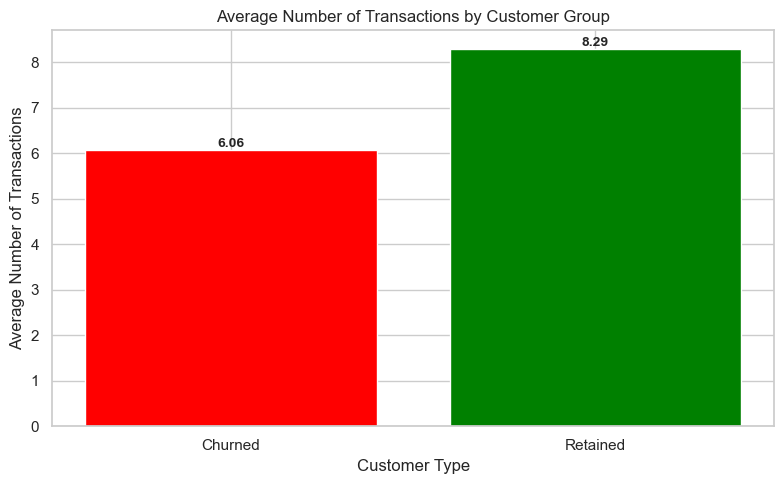

In [349]:
# Average Number of Transactions
labels = ['Churned', 'Retained']
values = [transactions_churned_agg['num_transactions'].mean(), transactions_retained_agg['num_transactions'].mean()]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Number of Transactions')
plt.title('Average Number of Transactions by Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

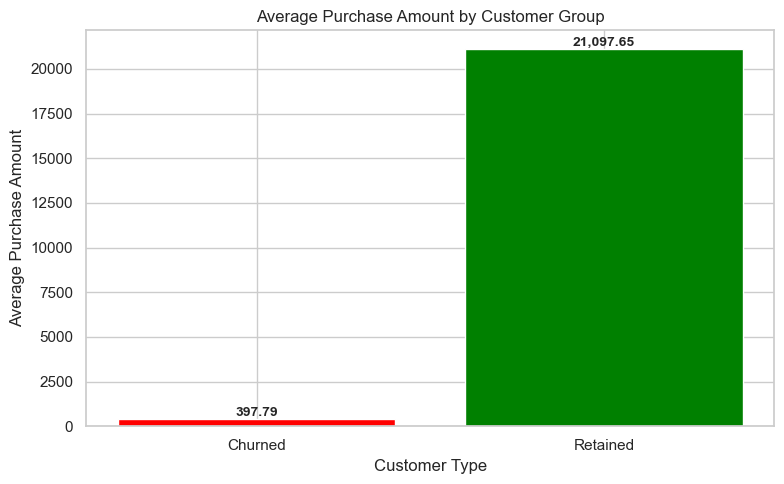

In [350]:
# Average Purchase Amount
labels = ['Churned', 'Retained']
values = [transactions_churned_agg['avg_purchase_amount'].mean(), transactions_retained_agg['avg_purchase_amount'].mean()]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

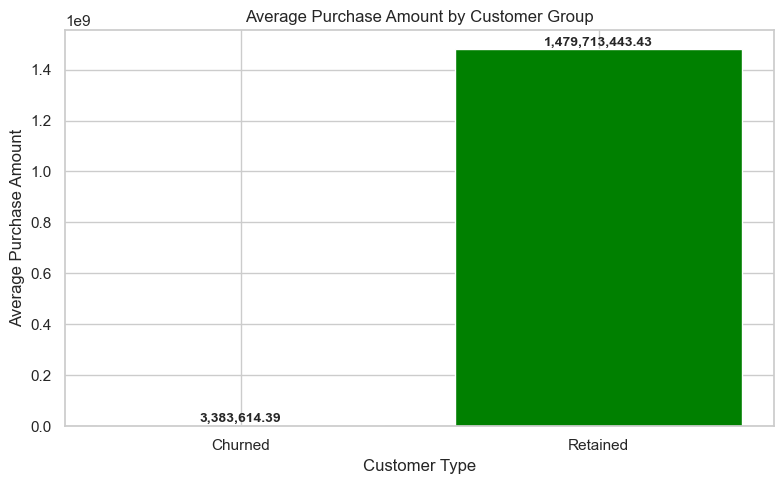

In [351]:
# Total Revenue Amount
labels = ['Churned', 'Retained']
values = [transactions_churned_agg['total_purchase_amount'].sum(), transactions_retained_agg['total_purchase_amount'].sum()]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase Amount by Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

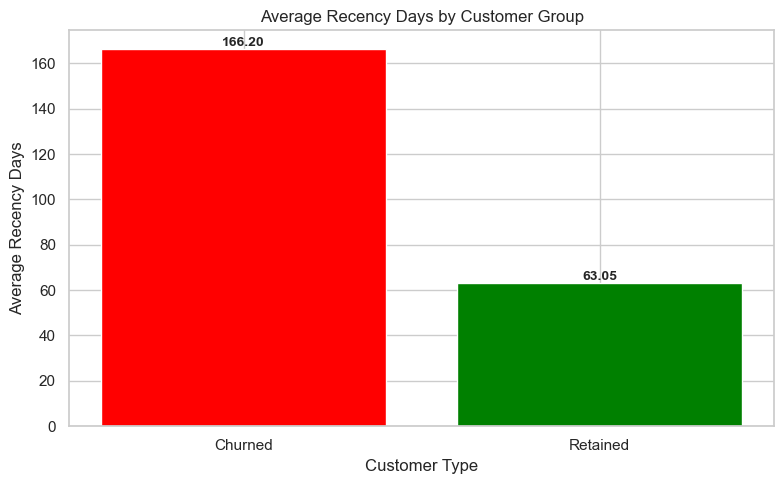

In [352]:
# Average Recency Days

# Recency: How many days ago the customer last transacted (lower = more recent)

labels = ['Churned', 'Retained']
values = [transactions_churned_agg['recency_days'].mean(), transactions_retained_agg['recency_days'].mean()]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Recency Days')
plt.title('Average Recency Days by Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

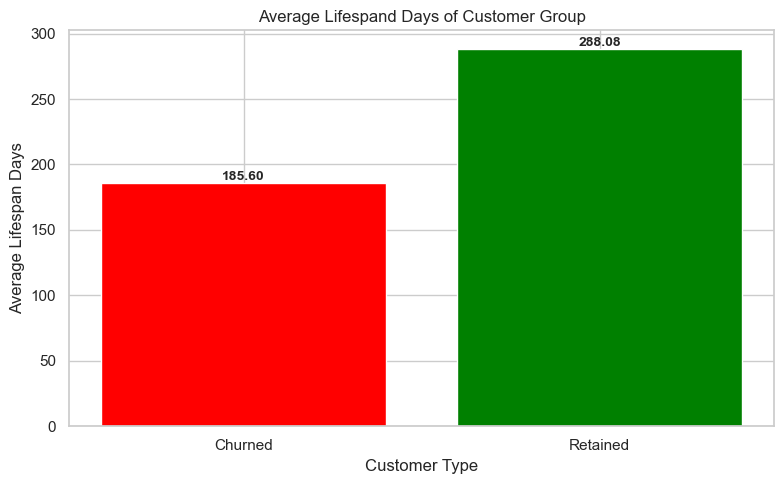

In [353]:
# Average First to Last Days of purchase

# First to Last Days: Number of days between the customer's first and last transaction (indicates engagement span)
labels = ['Churned', 'Retained']
values = [transactions_churned_agg['first_to_last_days'].mean(), transactions_retained_agg['first_to_last_days'].mean()]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Lifespan Days')
plt.title('Average Lifespand Days of Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

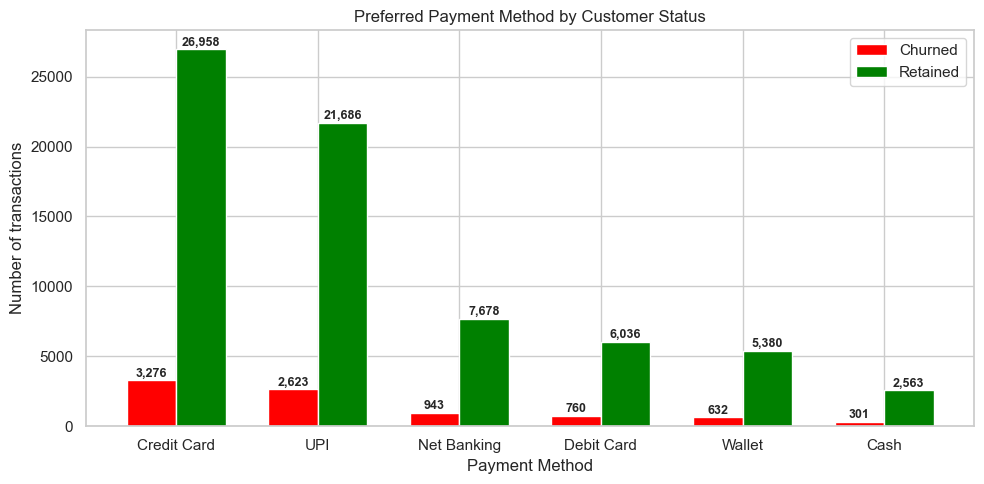

In [354]:
# Payment Methods
columns_labels, churned_data, retained_date = get_plot_data(transactions_churned, transactions_retained, 'payment_method')

# Prepare data
labels = columns_labels
churned_values = churned_data
retained_values = retained_date

x = range(len(labels))  # [0, 1, ..]
width = 0.35

# Plot
plt.figure(figsize=(10, 5))
bars1 = plt.bar([i - width/2 for i in x], churned_values, width=width, label='Churned', color='red')
bars2 = plt.bar([i + width/2 for i in x], retained_values, width=width, label='Retained', color='green')

# Labels and title
plt.xlabel('Payment Method')
plt.ylabel('Number of transactions')
plt.title('Preferred Payment Method by Customer Status')
plt.xticks(ticks=x, labels=labels)
plt.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 50,
                 f'{height:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

In [355]:
# Session_events
session_events.head()

,session_id,customer_id,event_type,timestamp,day_of_week,hour_of_day
0,2,3826,visit,2024-04-06 21:34:00,Saturday,21
1,3,9581,visit,2024-09-15 00:51:00,Sunday,0
2,4,3218,visit,2024-12-14 04:22:00,Saturday,4
3,5,6234,visit,2024-06-28 09:16:00,Friday,9
4,5,6234,add_to_cart,2024-06-28 09:25:00,Friday,9


In [356]:
# Step 1: Pivot event counts per customer
event_counts = (
    session_events
    .groupby(['customer_id', 'event_type'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

# Step 2: Total sessions and active days
customer_sessions = (
    session_events
    .groupby('customer_id')
    .agg(
        total_sessions=('session_id', 'nunique'),
        first_session=('timestamp', 'min'),
        last_session=('timestamp', 'max'),
        active_days=('timestamp', lambda x: x.dt.date.nunique())
    ).reset_index()
)

# Step 3: Merge both summaries
customer_session_df = pd.merge(customer_sessions, event_counts, on='customer_id', how='left')

# Step 4: Add Recency and Lifespan
latest_session_date = session_events['timestamp'].max()
customer_session_df['recency_days'] = (latest_session_date - customer_session_df['last_session']).dt.days
customer_session_df['lifespan_days'] = (customer_session_df['last_session'] - customer_session_df['first_session']).dt.days

# Step 5: Add churn status (from your existing churned customer list)
# Assume churn_df is a DataFrame with columns ['customer_id', 'churned']
customer_session_df = customer_session_df.merge(churn[['customer_id', 'churned']], on='customer_id', how='left')


# Mode day_of_week and hour_of_day per customer (most frequent)
from scipy.stats import mode

# Function to compute mode safely
def get_mode(series):
    return series.mode().iloc[0] if not series.mode().empty else None

# Group to find most common day and hour
temporal_prefs = (
    session_events
    .groupby('customer_id')
    .agg(
        most_common_day=('day_of_week', get_mode),
        most_common_hour=('hour_of_day', get_mode)
    )
    .reset_index()
)

# Merge into customer_session_df
customer_session_df = customer_session_df.merge(temporal_prefs, on='customer_id', how='left')

# Print first 5 rows
customer_session_df.head()

,customer_id,total_sessions,first_session,last_session,active_days,add_to_cart,checkout,purchase,visit,recency_days,lifespan_days,churned,most_common_day,most_common_hour
0,1,14,2024-04-13 07:36:00,2025-02-09 00:34:00,13,5,0,0,14,38,301,0.0,Tuesday,0
1,2,7,2024-06-06 04:01:00,2025-02-25 09:00:00,7,4,1,1,7,22,264,1.0,Tuesday,8
2,3,18,2024-03-20 11:10:00,2025-03-12 09:19:00,18,7,3,2,18,7,356,0.0,Sunday,8
3,4,8,2024-06-11 00:39:00,2025-03-05 00:16:00,9,5,4,3,8,14,266,0.0,Wednesday,20
4,5,17,2024-03-30 20:30:00,2025-02-15 08:07:00,17,11,8,3,17,32,321,1.0,Saturday,11


In [357]:
# Creating separate DataFrames for session events for customer groups
churned_session = customer_session_df[customer_session_df['churned'] == 1]
retained_session = customer_session_df[customer_session_df['churned'] == 0]

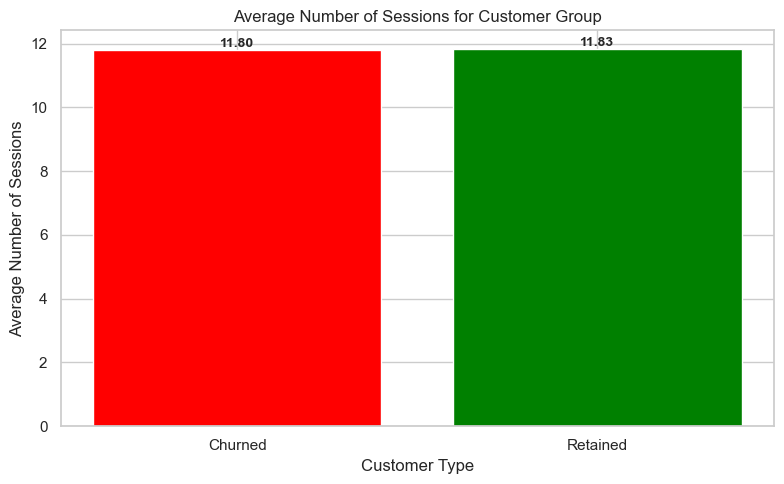

In [358]:
# Average Number of Sessions per customer

labels = ['Churned', 'Retained']
values = [churned_session['total_sessions'].mean(), retained_session['total_sessions'].mean()]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Number of Sessions')
plt.title('Average Number of Sessions for Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

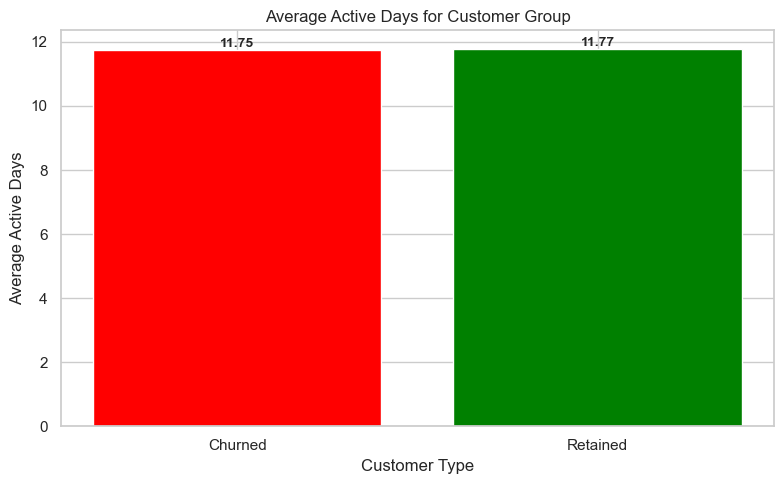

In [359]:
# Average active days

labels = ['Churned', 'Retained']
values = [churned_session['active_days'].mean(), retained_session['active_days'].mean()]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Active Days')
plt.title('Average Active Days for Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

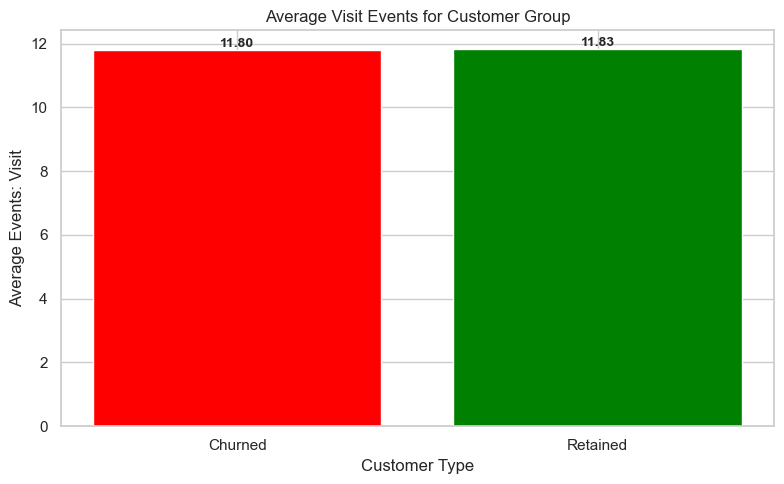

In [360]:
# Average visit events

labels = ['Churned', 'Retained']
values = [churned_session['visit'].mean(), retained_session['visit'].mean()]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Events: Visit')
plt.title('Average Visit Events for Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

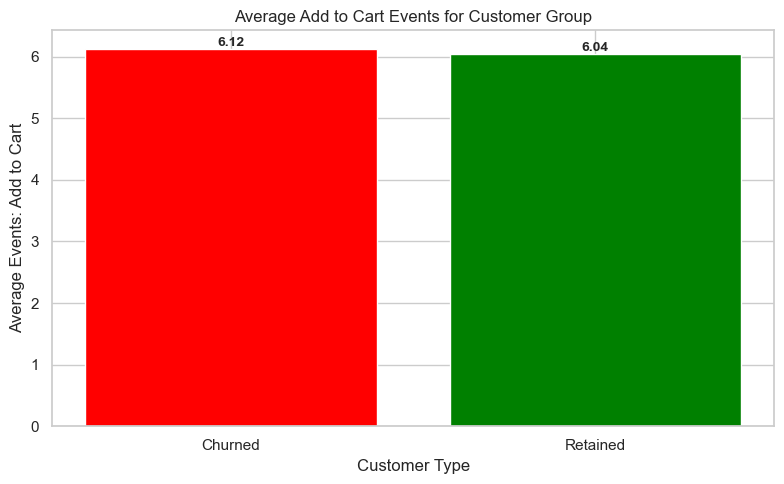

In [361]:
# Average add to cart events

labels = ['Churned', 'Retained']
values = [churned_session['add_to_cart'].mean(), retained_session['add_to_cart'].mean()]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Events: Add to Cart')
plt.title('Average Add to Cart Events for Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

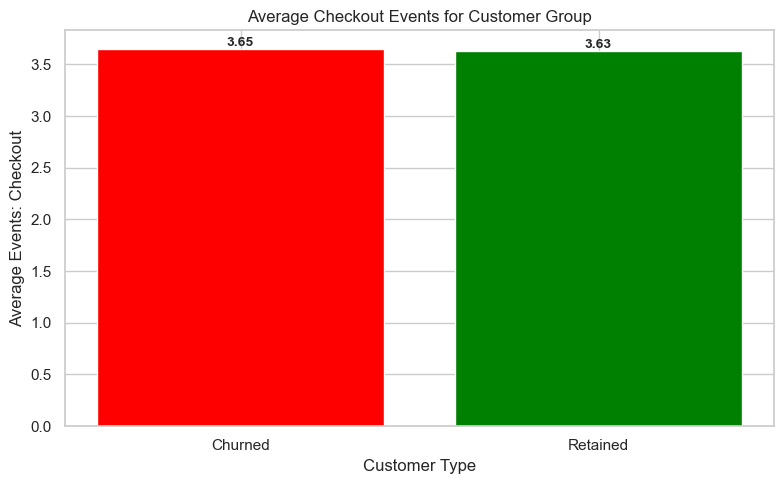

In [362]:
# Average checkout events

labels = ['Churned', 'Retained']
values = [churned_session['checkout'].mean(), retained_session['checkout'].mean()]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Events: Checkout')
plt.title('Average Checkout Events for Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

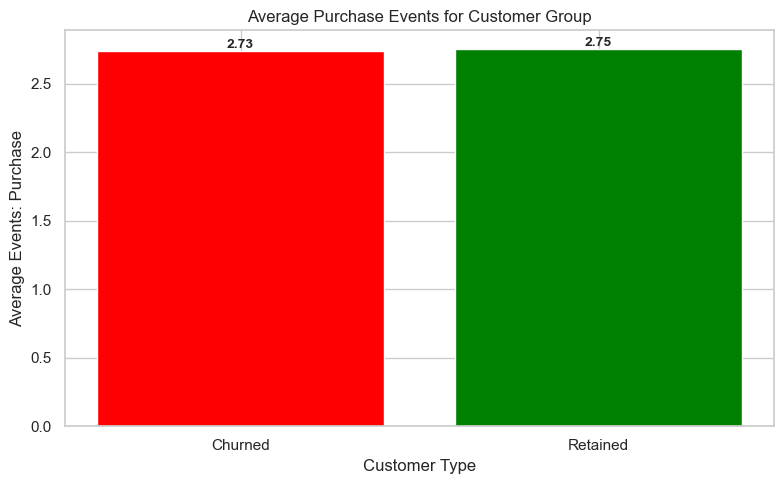

In [363]:
# Average puchase events

labels = ['Churned', 'Retained']
values = [churned_session['purchase'].mean(), retained_session['purchase'].mean()]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Events: Purchase')
plt.title('Average Purchase Events for Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

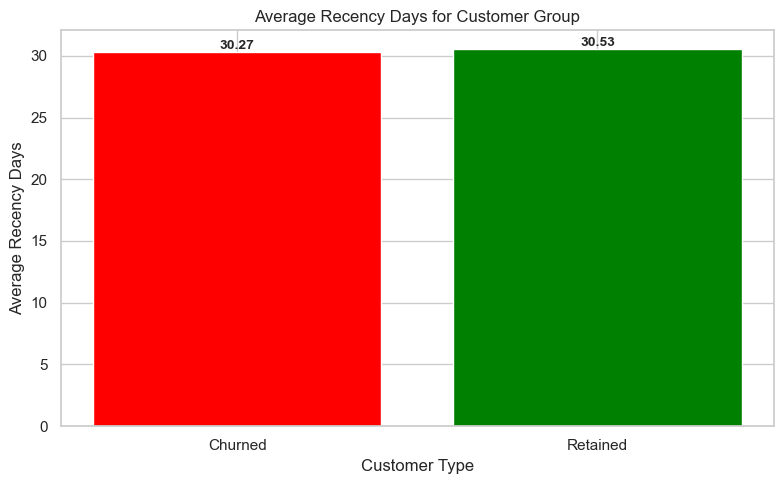

In [364]:
# Average recency days

labels = ['Churned', 'Retained']
values = [churned_session['recency_days'].mean(), retained_session['recency_days'].mean()]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Recency Days')
plt.title('Average Recency Days for Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

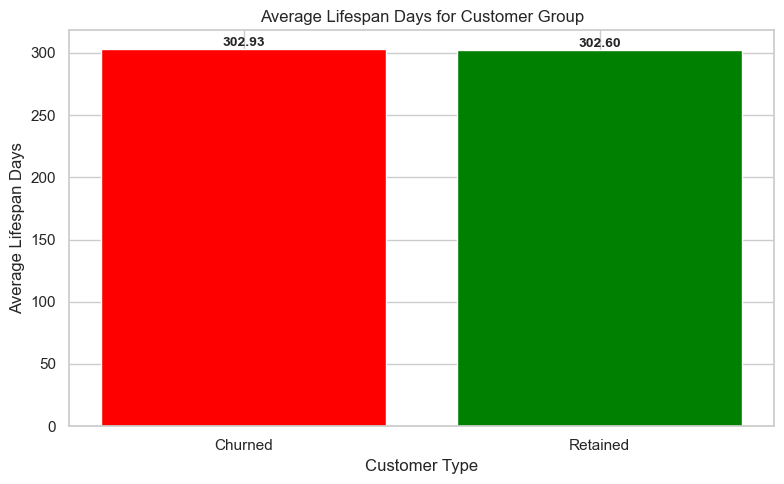

In [365]:
# Average lifespan days

labels = ['Churned', 'Retained']
values = [churned_session['lifespan_days'].mean(), retained_session['lifespan_days'].mean()]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['red', 'green'])

# Add labels and title
plt.xlabel('Customer Type')
plt.ylabel('Average Lifespan Days')
plt.title('Average Lifespan Days for Customer Group')

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,
             f'{height:,.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

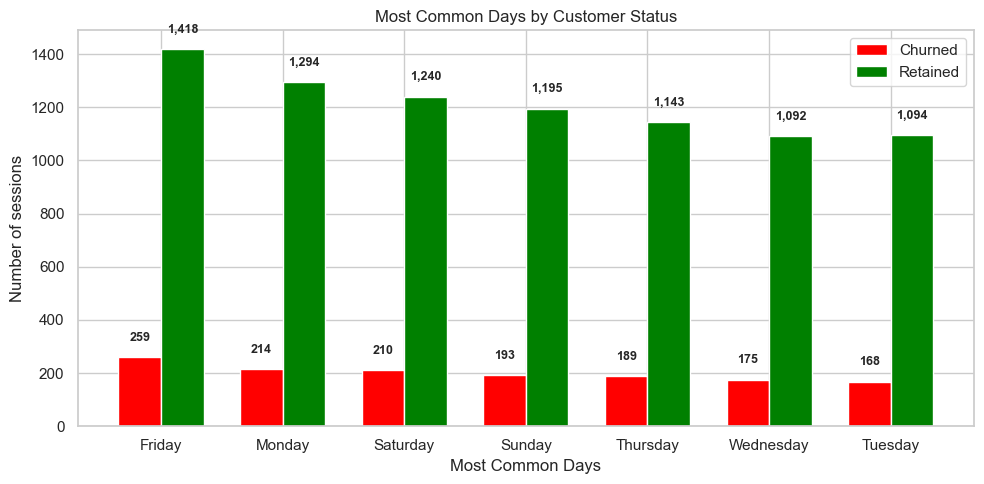

In [366]:
# Most Common Days for sessions
columns_labels, churned_data, retained_date = get_plot_data(churned_session, retained_session, 'most_common_day')

# Prepare data
labels = columns_labels
churned_values = churned_data
retained_values = retained_date

x = range(len(labels))  # [0, 1, ..]
width = 0.35

# Plot
plt.figure(figsize=(10, 5))
bars1 = plt.bar([i - width/2 for i in x], churned_values, width=width, label='Churned', color='red')
bars2 = plt.bar([i + width/2 for i in x], retained_values, width=width, label='Retained', color='green')

# Labels and title
plt.xlabel('Most Common Days')
plt.ylabel('Number of sessions')
plt.title('Most Common Days by Customer Status')
plt.xticks(ticks=x, labels=labels)
plt.legend()

# Annotate bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 50,
                 f'{height:,}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

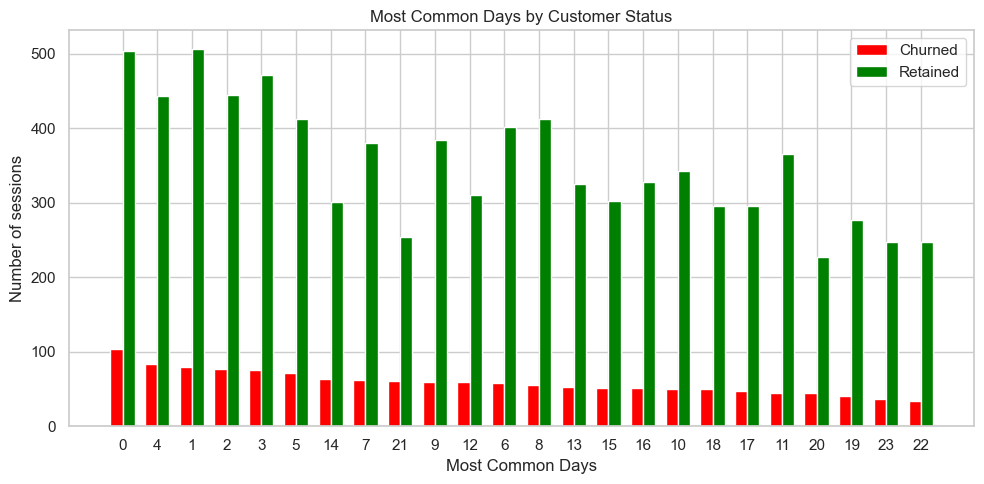

In [367]:
# Most Common Hour for sessions
columns_labels, churned_data, retained_date = get_plot_data(churned_session, retained_session, 'most_common_hour')

# Prepare data
labels = columns_labels
churned_values = churned_data
retained_values = retained_date

x = range(len(labels))  # [0, 1, ..]
width = 0.35

# Plot
plt.figure(figsize=(10, 5))
bars1 = plt.bar([i - width/2 for i in x], churned_values, width=width, label='Churned', color='red')
bars2 = plt.bar([i + width/2 for i in x], retained_values, width=width, label='Retained', color='green')

# Labels and title
plt.xlabel('Most Common Days')
plt.ylabel('Number of sessions')
plt.title('Most Common Days by Customer Status')
plt.xticks(ticks=x, labels=labels)
plt.legend()
plt.tight_layout()
plt.show()

## Customer Segmentation

In [369]:
# Printing first 5 rows of transactions data to be used in RFM Analysis
transactions.head()

,transaction_id,customer_id,purchase_amount,product_category,payment_method,transaction_date,day_of_week,transaction_hour
0,1,5143,27819.68,Electronics,UPI,2024-12-28 22:48:00,Saturday,22
1,2,3756,20823.74,Electronics,Credit Card,2024-10-06 09:46:00,Sunday,9
2,3,9992,20699.54,Electronics,Credit Card,2024-05-19 23:58:00,Sunday,23
3,4,4686,37018.61,Premium Home Decor,UPI,2024-08-24 03:56:00,Saturday,3
4,5,4709,2947.41,Premium Home Decor,UPI,2024-11-25 08:35:00,Monday,8


In [370]:
# Setting the reference date
reference_date = datetime(2025, 3, 21)

# Creating DataFrame rfm using transactions grouped by.
rfm = transactions.groupby('customer_id').agg({
    'transaction_date' : lambda x: (reference_date - x.max()).days,    # Recency
    'transaction_id' : 'count',                                        # Frequency
    'purchase_amount' : 'sum'                                          # Monetary
}).rename(columns={
    'transaction_date': 'recency',
    'transaction_id' : 'frequency',
    'purchase_amount' : 'monetary'
})

In [371]:
# Calculating scores for recency, frequency, and monetary

# recency score: 5 is highest meaning very recent transaction, 1 is lowest with no recent transactions
rfm['r_score'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)

# frequency score: 5 is highest with highest number of transactions, 1 is lowest with least number of transactions
rfm['f_score'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)

# monetary score: 5 is highest with highest total amount of purchases, 1 is lowest with least amount of total purchases 
rfm['m_score'] = pd.qcut(rfm['monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

In [372]:
# Printing updated DataFrame
rfm.head().sort_index()

,recency,frequency,monetary,r_score,f_score,m_score
customer_id,,,,,,
1,38,8,216330.58,3,3,4
2,115,8,2892.71,1,3,1
3,6,14,345580.27,5,5,5
4,27,5,40099.45,3,1,2
5,111,7,2698.44,1,2,1


In [373]:
# rfm score combined describes what segment does the customer belongs to.
rfm['rfm_score'] = rfm['r_score'].astype('str') + rfm['f_score'].astype('str') + rfm['m_score'].astype('str')

# Print first rows with rfm score
rfm.head()

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
customer_id,,,,,,,
1,38,8,216330.58,3,3,4,334
2,115,8,2892.71,1,3,1,131
3,6,14,345580.27,5,5,5,555
4,27,5,40099.45,3,1,2,312
5,111,7,2698.44,1,2,1,121


In [374]:
# Defining segments and assigning customers to the segments
def assign_segment(row):
    if row['r_score'] >= 4 and row['f_score'] >= 4 and row['m_score'] >= 4:
        return 'Champion'                                                   # Champions are recent, frequent, and high spenders.
    elif row['r_score'] >= 3 and row['f_score'] >= 3: 
        return 'Loyal Customer'                                             # Loyal Customers are frequent and recent enough, with moderate-to-high value.
    elif row['r_score'] >= 4:
        return 'Potential Loyalist'                                         # Potential Loyalists are newly acquired and active.
    elif row['r_score'] <= 2 and row['f_score'] <= 2:
        return 'At Risk'                                                    # At Risk customers are inactive across all 3 metrics.
    else:
        return 'Hibernating'                                                # Hibernating customers don’t meet any specific strong criteria — but aren't lost entirely.

# Adding the column to the rfm DataFrame
rfm['Segment'] = rfm.apply(assign_segment, axis=1)

# Printing first 5 rows of rfm DataFrame
rfm.head()

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score,Segment
customer_id,,,,,,,,
1,38,8,216330.58,3,3,4,334,Loyal Customer
2,115,8,2892.71,1,3,1,131,Hibernating
3,6,14,345580.27,5,5,5,555,Champion
4,27,5,40099.45,3,1,2,312,Hibernating
5,111,7,2698.44,1,2,1,121,At Risk


In [375]:
# Getting data for PowerBi Visualization
# churn.to_csv('churn_powerbi.csv')
# transactions.to_csv('transactions_powerbi.csv')
# customers.to_csv('customers_powerbi.csv')
# session_events.to_csv('session_events_powerbi.csv')
# rfm.to_csv('rfm.csv')